# Employe Attrition / Turnover Prediction
memprediksi employee yang akan keluar dari kantor

projek yang terinspirasi dari penasaran bagaimana mencegah member JKT48 graduate, atau talent keluar dari Agensi
- menggunakan konsep dan metode yang digunakan untuk memprediksi karyawan dari perusahaan
- memprediksi karyawan berdasarkan data-data performa, insentif, gaji

menggunakan konsep dan data dari penerapan prediksi employee pada karyawan IBM

## Persiapan
Import library yang diperlukan
- mulai dari pandas dan numpy untuk pengolahan data data, kemudian matplotlib dan seaborn untuk visuaisasi data
- kemudian ada library untuk preprocess yaitu label encoder dan minmax scaler, pembagian data yaitu train_test_split
- randomized search dan grid search dari sklearn.model_selection untuk hyperparameter tunning
- metrics accuracy_score, classification report, dan confusion matrix untuk mengukur performa model
- library algoritma machine learning Logistic Regression, Random Forest dan KNN
- library untuk mengabaikan pesan warning yang mengganggu tampilan notebook

In [2]:
# starter library for data processing and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library for data preparation, split data, hyperparameter tunning, and model performance measurement
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# library for machine learning class to be imported as object
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# library for ignoring warning message, because it's disturbing the display of analytical story telling
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Membaca data

In [4]:
employee_df = pd.read_csv('Final_dataset_Attrition.csv')
# kalau ada kolom 'Unnamed: 32', drop column inplace true
employee_df.drop(columns='Unnamed: 32', inplace=True)
# data head
employee_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract


Data terdiri dari 32 kolom dan 1470 baris

In [4]:
# isi kolom employee
print('jumlah baris dan kolom :', employee_df.shape)
employee_df.info()

jumlah baris dan kolom : (1470, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   o

Pembagian Data Usecase dengan Real

In [5]:
# 1000 baris data teratas untuk train, 
usecase_df = employee_df.loc[:999]
# sisanya untuk data test
realcase_df = employee_df.loc[1000:, employee_df.columns != 'Attrition']

Baca Data / Inspect

In [6]:
# data info
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Attrition                1000 non-null   object 
 2   BusinessTravel           1000 non-null   object 
 3   Department               1000 non-null   object 
 4   DistanceFromHome         1000 non-null   int64  
 5   Gender                   1000 non-null   object 
 6   JobInvolvement           1000 non-null   int64  
 7   JobLevel                 1000 non-null   int64  
 8   JobRole                  1000 non-null   object 
 9   JobSatisfaction          1000 non-null   int64  
 10  MaritalStatus            1000 non-null   object 
 11  MonthlyIncome            1000 non-null   int64  
 12  NumCompaniesWorked       1000 non-null   int64  
 13  OverTime                 1000 non-null   object 
 14  PercentSalaryHike        

In [21]:
# data shape
usecase_df.shape

(1000, 32)

In [22]:
# data describe numerical
usecase_df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.00000,1000.000000
mean,35.544000,8.98700,2.735000,1.754000,2.716000,5338.095000,2.943000,15.221000,3.148000,0.769000,8.86200,2.787000,3.779000,1.023000,2.375000,NaN,2.54200,1.526000
std,9.309712,7.94657,0.727533,0.961462,1.104792,3993.941052,2.525496,3.550319,0.355278,0.859289,6.71685,1.302047,2.252384,1.577644,2.088237,NaN,1.73414,1.098422
min,18.000000,1.00000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000
25%,29.000000,2.00000,2.000000,1.000000,2.000000,2643.500000,1.000000,12.000000,3.000000,0.000000,5.00000,2.000000,2.000000,0.000000,1.000000,NaN,1.00000,1.000000
50%,34.000000,7.00000,3.000000,2.000000,3.000000,4137.500000,2.000000,14.000000,3.000000,1.000000,7.00000,3.000000,4.000000,1.000000,2.000000,NaN,3.00000,2.000000
75%,41.000000,13.00000,3.000000,2.000000,4.000000,6325.000000,4.000000,18.000000,3.000000,1.000000,10.00000,3.000000,5.000000,1.000000,3.000000,NaN,4.00000,2.000000
max,60.000000,29.00000,4.000000,5.000000,4.000000,19943.000000,9.000000,25.000000,4.000000,3.000000,37.00000,6.000000,8.000000,7.000000,7.000000,NaN,5.00000,3.000000


In [7]:
# data describe categorical
usecase_df.describe(include=[object])

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,3,3,2,9,3,2,4,710,5,2,2,4,3
top,No,Travel_Rarely,Research & Development,Male,Research Scientist,Married,No,Post-Graduation,17-02-2016,Dept.Head,WFH,No,Recruiter,FullTime
freq,813,721,667,607,237,434,704,258,5,216,527,505,280,365


Data Cleansing

In [17]:
# cek jumlah baris data yang hilang dari tiap kolom
usecase_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Date_of_Hire               0
Date_of_termination        0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
dtype: int64

In [10]:
# cek jumlah baris data yang duplicate dari tiap kolom
usecase_df[usecase_df.duplicated()].count()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Date_of_Hire               0
Date_of_termination        0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
dtype: int64

menghapus kolom yang tidak perlu karena tidak begitu berpengaruh

In [6]:
# mengganti missing value menjadi 0
# usecase_df['Date_of_termination'].fillna(0, inplace=True)
# usecase_df['Date_of_termination'] = usecase_df['Date_of_termination'].astype(int)
usecase_df.drop(columns=['Date_of_Hire', 'Date_of_termination'], inplace=True)

cleansing kolom businesstravel, cuma buat hapus Travel_ nya aja, intinya antara Rarely ama Frequently aja

In [7]:
# split kolom businesstravel dengan _ jadi 2 kolom temp dengan expand = True, supaya terbagi menjadi 2 
temp_bustrav = usecase_df['BusinessTravel'].str.split('_', n=1, expand=True)
# hapus kolom yg isinya travel
usecase_df['TravelOnly'] = temp_bustrav[0]
usecase_df['NewBusTrav'] = temp_bustrav[1]

# delete column yg tidak perlu dengan inplace True
usecase_df.drop(columns=['BusinessTravel', 'TravelOnly'], inplace=True)
# kolom businesstravel yg temp dijadiin yg baru
usecase_df.rename(columns={'NewBusTrav':'BusinessTravel'}, inplace=True)

new_bustrav = usecase_df['BusinessTravel']
# business travel yang sebelumnya dihapus
usecase_df.drop(columns='BusinessTravel', inplace=True)
# buat dipindahin ke posisi semula yaitu ke 2 pake function insert position
usecase_df.insert(2, 'BusinessTravel', new_bustrav)
# apabila ada Business Travel yang kosong, isi dengan Unknown
usecase_df['BusinessTravel'].fillna('Unknown', inplace=True)

Exploratory Data Analysis

In [47]:
usecase_df['Attrition'].value_counts()

No     813
Yes    187
Name: Attrition, dtype: int64

In [8]:
# persentase perbandingan yang stay dengan yang left
stayed = usecase_df[usecase_df['Attrition']=='Yes'].shape[0]
left = usecase_df[usecase_df['Attrition']=='No'].shape[0]
print(f'Number of Employee Stayed : {stayed/(stayed+left)*100:.1f} %')
print(f'Number of Employee Left : {left/((stayed+left))*100:.1f} %')

Number of Employee Stayed : 18.7 %
Number of Employee Left : 81.3 %


menampilkan jumlah karyawan yang menetap dan karyawan yang keluar dari perusahaan
- sebagian besar karyawan masih menetap dengan jumlah 813 orang
- sebagian kecil karyawan yang keluar dengan jumlah 187 orang

Text(0, 0.5, 'Number of Employee')

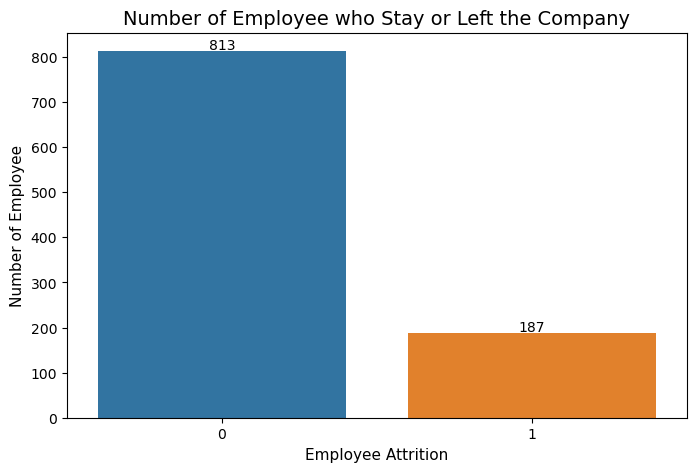

In [119]:
# visualisasi kolom label
plt.figure(figsize=(8,5))
cplot = sns.countplot(usecase_df['Attrition'])

for cp in cplot.patches:
    cplot.annotate(format(cp.get_height(), '.0f'), (cp.get_x() + cp.get_width() / 2., cp.get_height()),  
                   ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

plt.title('Number of Employee who Stay or Left the Company', fontsize=14)
plt.xlabel('Employee Attrition', fontsize=11)
plt.ylabel('Number of Employee', fontsize=11)

Pembagian kolom antara Categorical dan Numerical

berdasarkan jumlah unique (len), karena ada kolom kategorikal yang sudah ber-value numerik

In [124]:
for col in usecase_df.columns:
    uniq_len = len(usecase_df[col].unique())
    print(f'{col} ({usecase_df[col].dtype}) : {uniq_len} unique values')

Age (int64) : 43 unique values
Attrition (object) : 2 unique values
BusinessTravel (object) : 3 unique values
Department (object) : 3 unique values
DistanceFromHome (int64) : 29 unique values
Gender (object) : 2 unique values
JobInvolvement (int64) : 4 unique values
JobLevel (int64) : 5 unique values
JobRole (object) : 9 unique values
JobSatisfaction (int64) : 4 unique values
MaritalStatus (object) : 3 unique values
MonthlyIncome (int64) : 919 unique values
NumCompaniesWorked (int64) : 10 unique values
OverTime (object) : 2 unique values
PercentSalaryHike (int64) : 15 unique values
PerformanceRating (int64) : 2 unique values
StockOptionLevel (int64) : 4 unique values
TotalWorkingYears (int64) : 38 unique values
TrainingTimesLastYear (int64) : 7 unique values
YearsAtCompany (int64) : 9 unique values
YearsSinceLastPromotion (int64) : 8 unique values
YearsWithCurrManager (int64) : 8 unique values
Higher_Education (object) : 4 unique values
Status_of_leaving (object) : 5 unique values
Mode

biasanya semakin banyak unique value dari kolom cenderung kolom numerikal, minimal 20 unique value   
sedangkan data kategorikal unique value nya cenderung sedikit, kurang dari 20 unique

In [162]:
numeric_columns = []
categ_columns = []

for col in usecase_df.columns:
    # pastikan kalau kolom label Attrition tidak masuk
    if col != 'Attrition':
        uniq_len = len(usecase_df[col].unique())
        # jika jumlah unique data kurang dari 20 adalah kategori
        if uniq_len <= 20:
            # print(col, 'is CATEGORY')
            categ_columns.append(col)
        # jika jumlah unique data lebih dari 20 adalah numerik
        else:
            # print(col, 'is NUMERIC')
            numeric_columns.append(col)

kemudian dipisahkan kembali antara kategorikal yang banyak unique valuenya dengan sedikit 

karena menggunakan chart yang berbeda

In [154]:
big_categ = []
small_categ = []

for categ in categ_columns:
    uniq_categ = len(usecase_df[categ].unique())
    # kategorikal yg krg dr 4 masuk small categ
    if uniq_categ < 5:
        # print(categ, ' is SMALL CATEG :', uniq_categ)
        small_categ.append(categ)
    # kategorikal yg lebih dari 4 masuk big categ
    else:
        # print(categ, ' is BIG CATEG :', uniq_categ)
        big_categ.append(categ)

untuk kategorikal yang jumlahnya sedikit menggunakan pie chart
- pada business travel, walaupun jumlah yang sering hingga jarang berdinas keluar sangat jauh
  - selesih persentase pada diagram karyawan hengkang lebih besar 30% dibanding yang menetap 16%
  - sedangkan yang jarang berdinas keluar lebih cenderung menetap 
  - ini menandakan bahwa karyawan yang sering berdinas keluar lebih cenderung memilih hengkang
- job satisfacation dari kedua diagram menampilkan angka berbeda dengan proporsi presentase sama
  - pada diagram karyawan menetap 4 yg terbesar 33 %, sama dengan persentase dari diagram hengkang yaitu angka 3
  - artinya karyawan yang puas cenderung menetap, sebaliknya yang tidak puas akan hengkang
  - terdapat banyak faktor yang membuat karyawan kurang puas atau puas terhadap kerjaan sekarang
- diagram overtime dari kedua diagram menampilkan proporsi persentase berbeda
  - persentase terbesar 77% karyawan tidak overtime dari yang mentap dan 56% karyawan overtime dari yang hengkang
  - artinya karyawan yang bekerja overtime cenderung hengkang, sedangkan yang bekerja cukup cenderung menetap
  - bekerja overtime membuat karyawan kelelahan dan mengurangi kemampuan produktif, sehingga tidak nyaman
- persentase stockoptionlevel 0 dikedua lingkaran sama2 menjadi yang terbesar
  - karyawan yang menetap berkisar 43% di level 0, diikuti yang level 1 berkisar 40%
  - karyawan yang hengkang berkisar 66% di level 0, diikuti yang level 2 berkisar 23 %
  - dari perbedaan persentase tersebut bahwa karyawan yang mendapat opsi saham akan lebih betah dibanidng yang tidak
  - semakin tinggi level opsi sahamnya, maka semakin kuat kemungkinan untuk menetap selama mungkin
- 2 higher_education persentase terbanyak dari kedua diagram menampilkan posisi yang terbalik
  - karyawan yang menetap post-graduation hingga PHD, sedangkan yang hengkang dimulai dari PhD hingga Post-Graduate
  - karyawan yang baru lulus S1 cenderung menetap karena keinginan untuk belajar dan meniti karir
  - sedangkan yang lulusan S3 atau PHD kemungkinan memilih hengkang karena berbagai faktor atau pertimbangan pribadi
- mode_of_work pada karyawan menetap sebesar 53% WFH, namun mode_of_work dari yang hengkang sama proporsinya
  - bahwa karyawan yang diberi ijin bekerja WFH cenderung menetap, karena meningkatkan kenyamanan dalam kerja 
- persentase absenteeism dari kedua lingkaran pada 1 dan 3, posisi persentase berbanding terbalik
  - persentase karyawan menetap tertinggi persentase 26% pada 3 angka ketidakhadiran
  - persentase karyawan hengkang tertinggi persentase 26% pada 1 angka ketidakhadiran
  - terlihat kalau karyawan yang lebih sering hadir justru cenderung hengkang
- persentase job_mode dari kedua diagram, persentase terbesar menampilkan value berbeda
  - karyawan yang hengkang 36% statusnya partime dan yang menetap 33% statusnya kontrak
  - karena karyawan yang kerja paruh waktu masih punya celah dibanding kontrak yang punya perjanjian

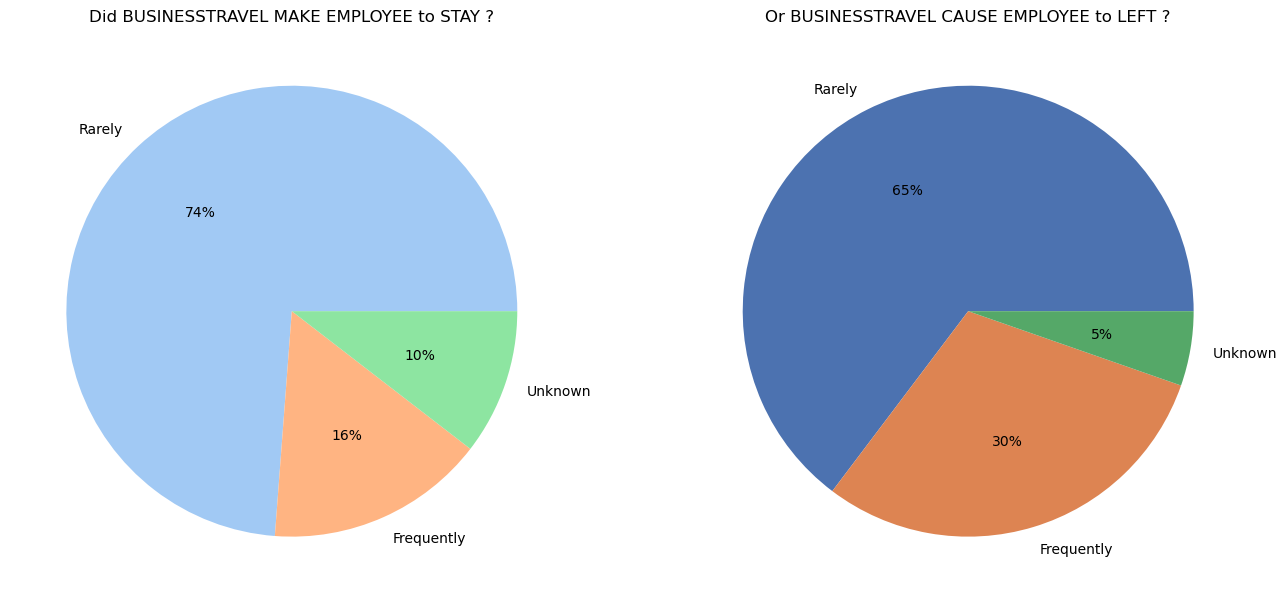

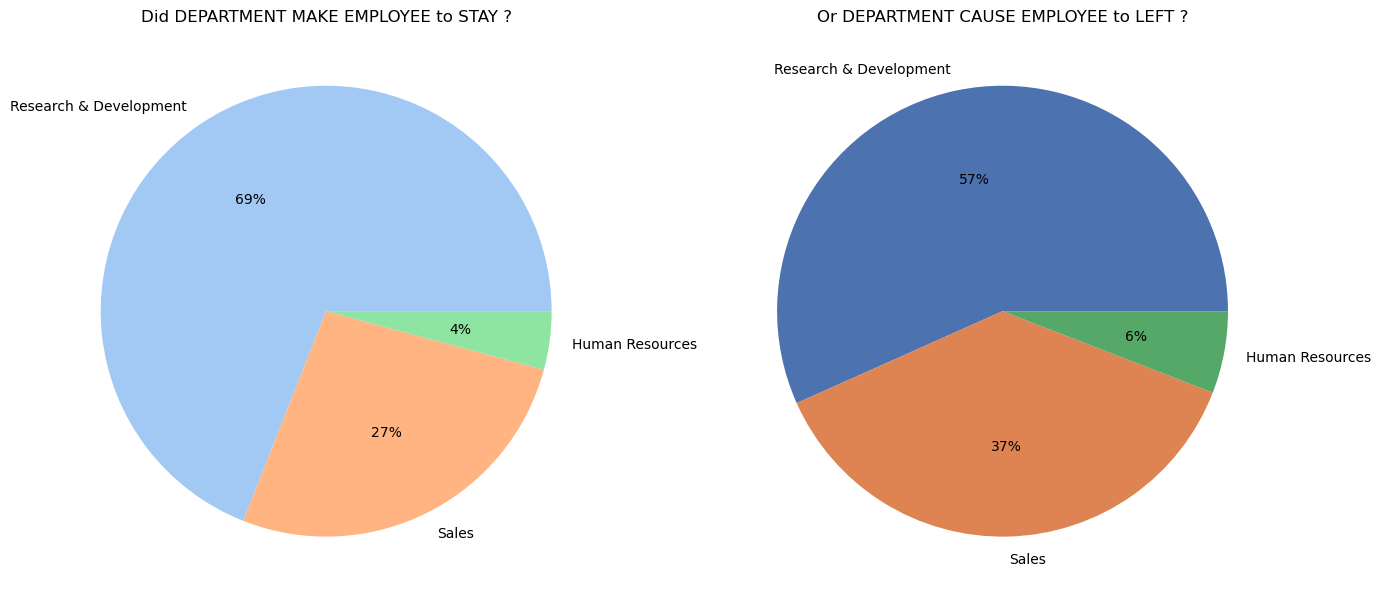

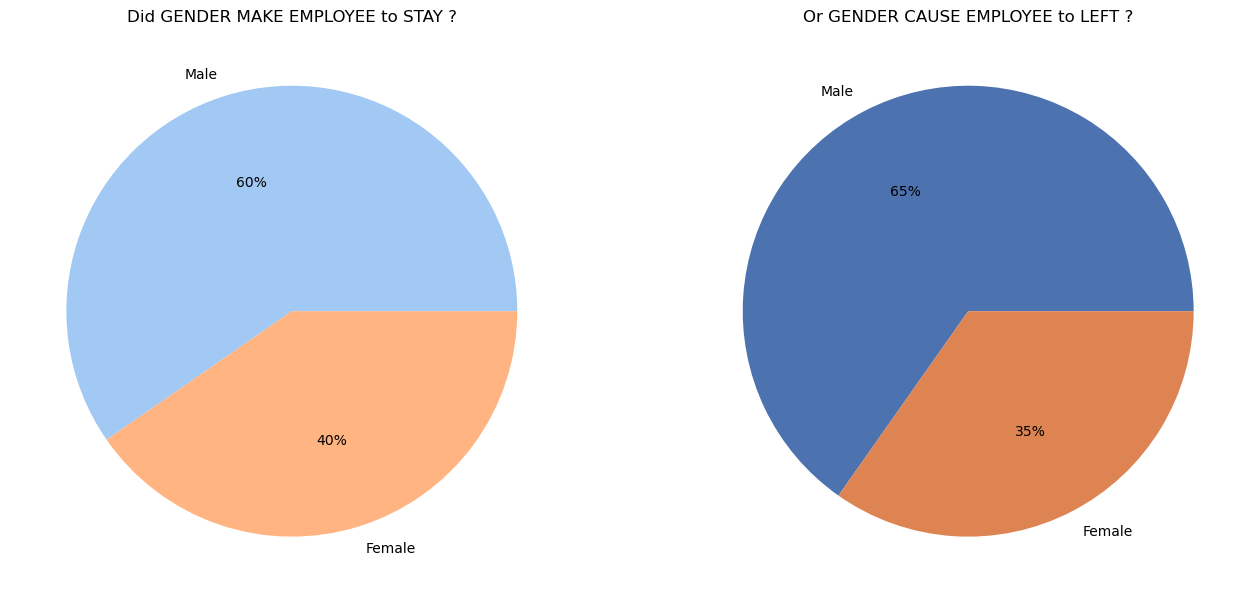

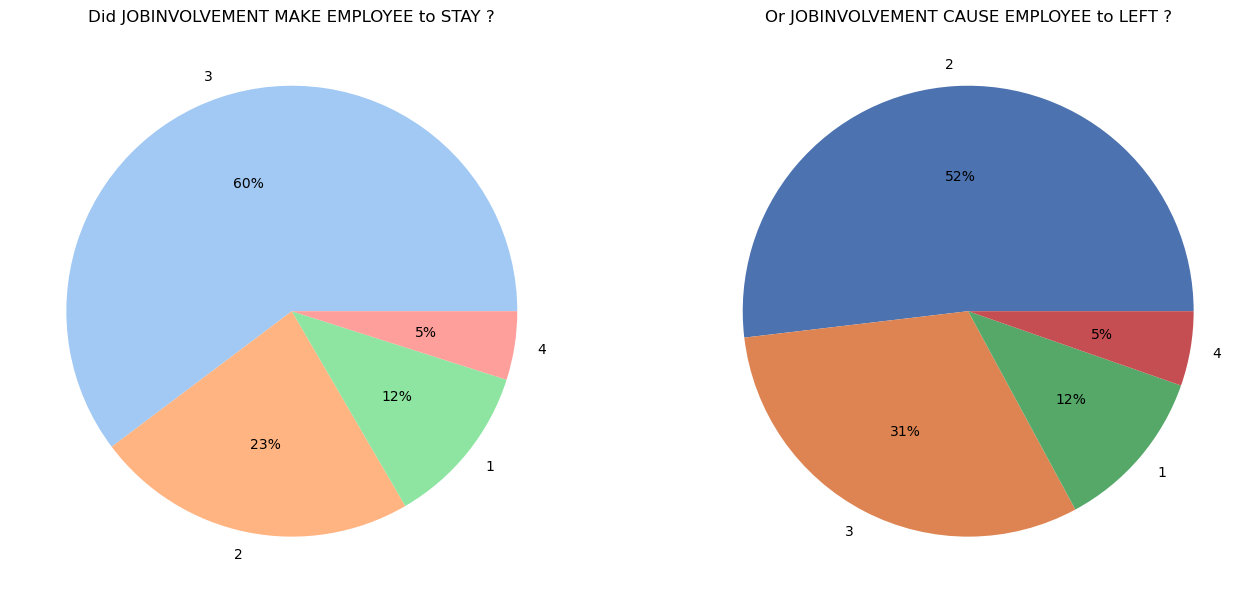

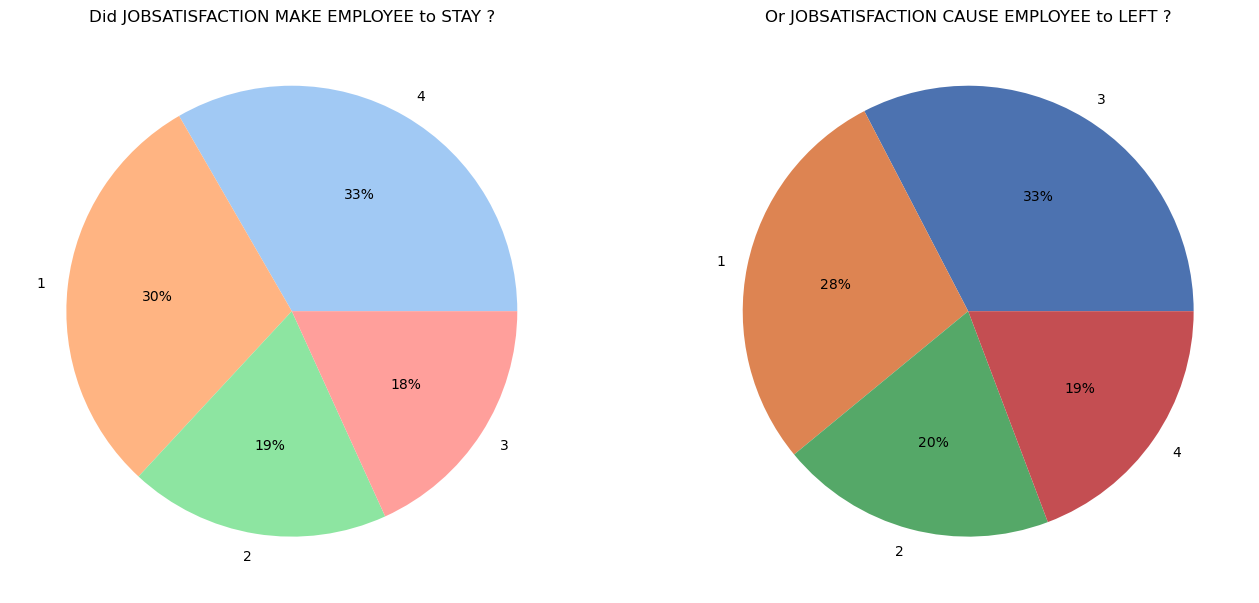

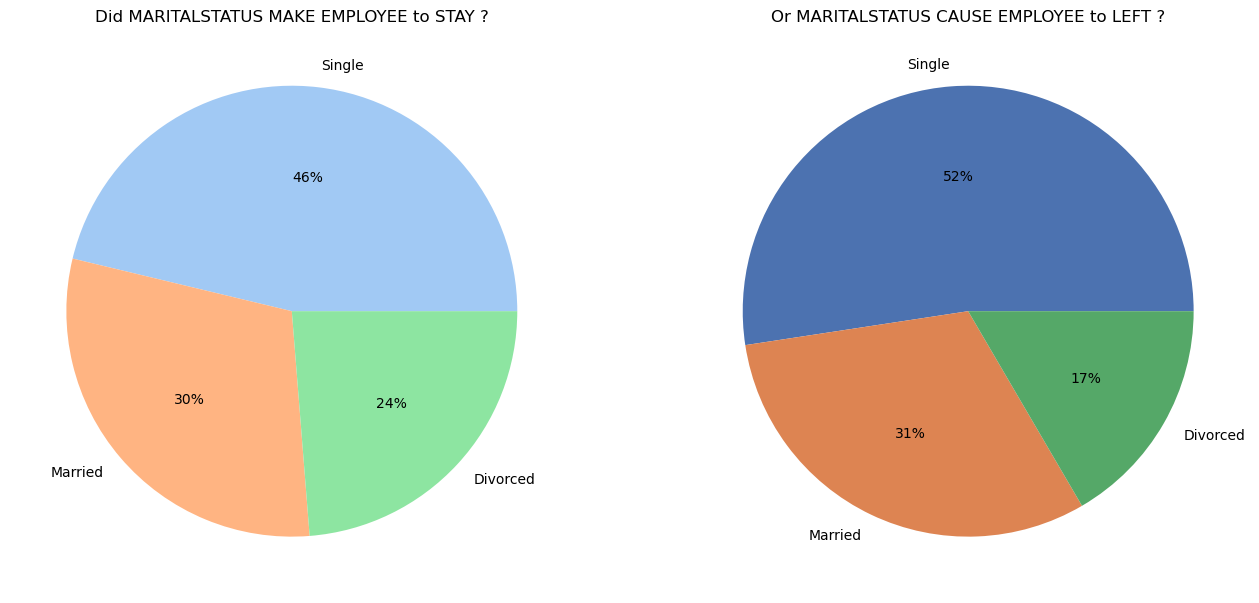

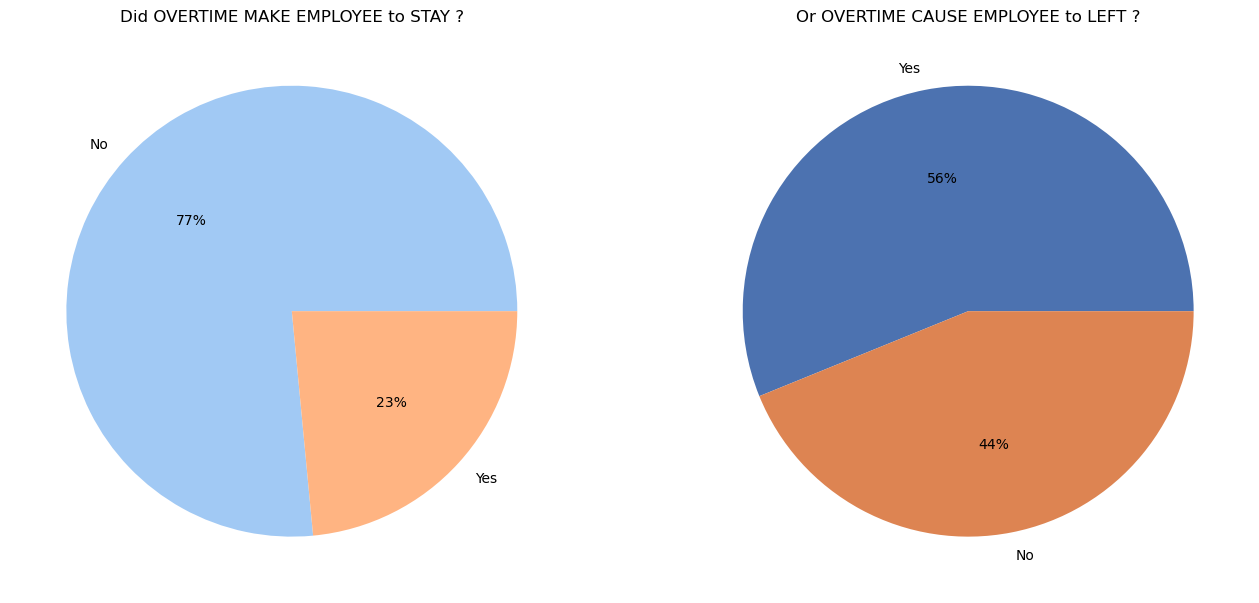

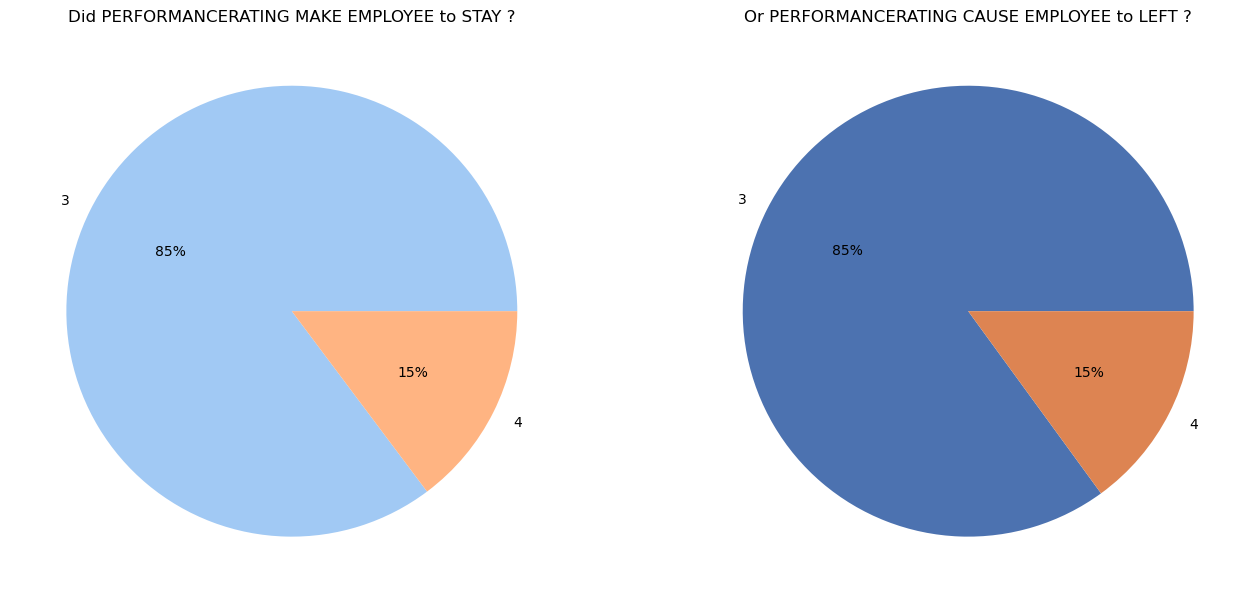

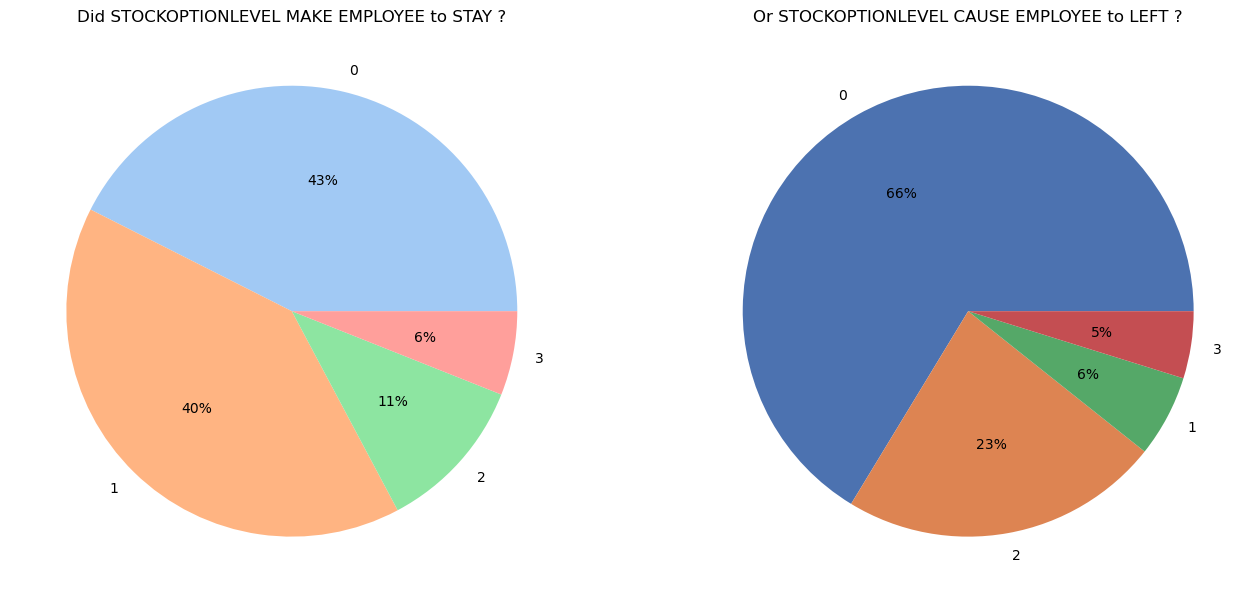

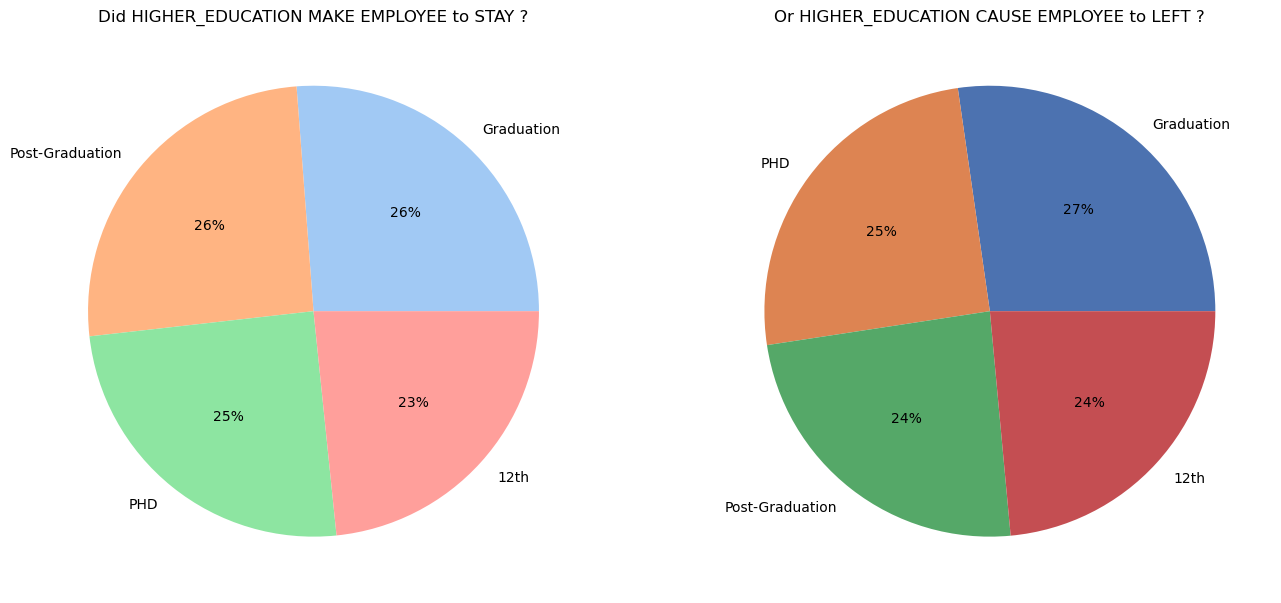

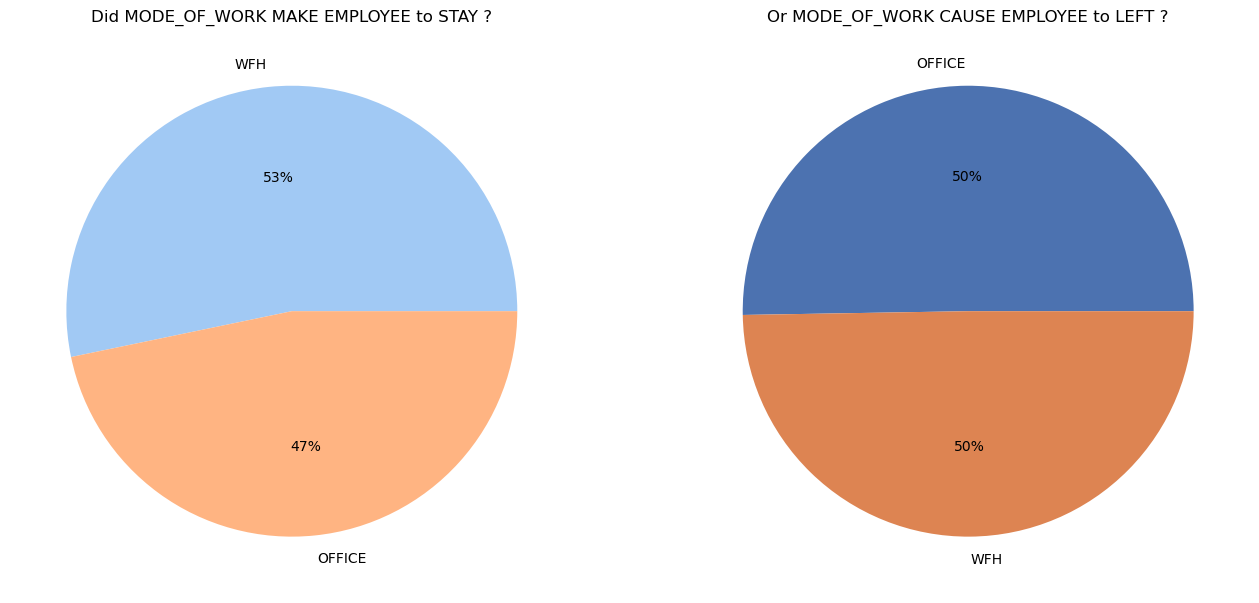

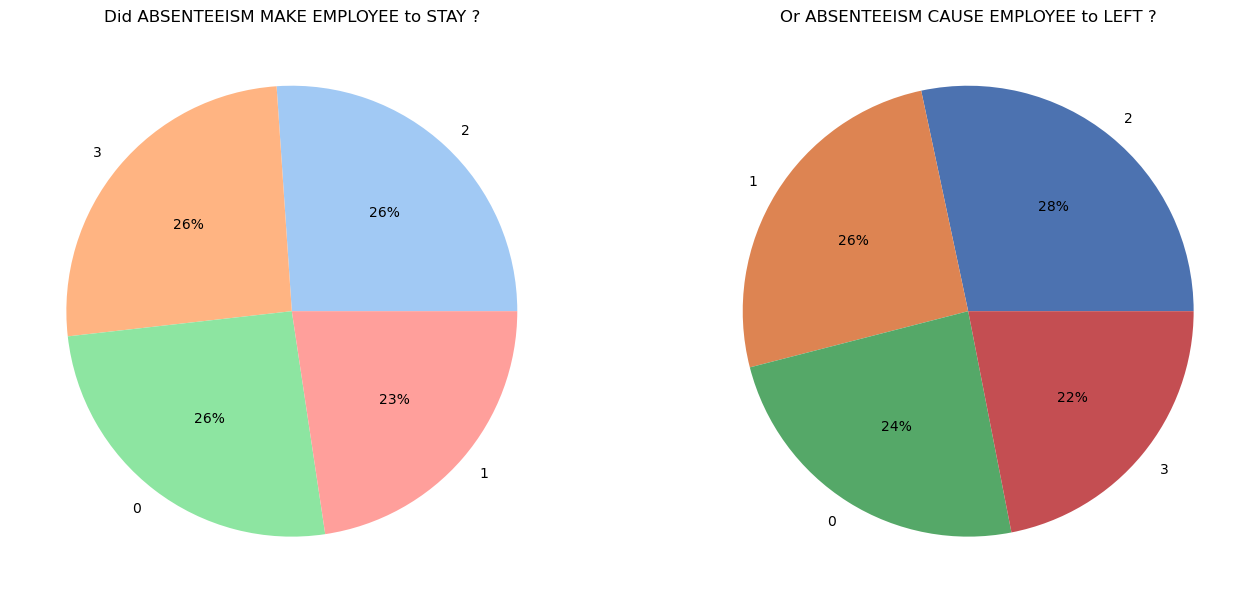

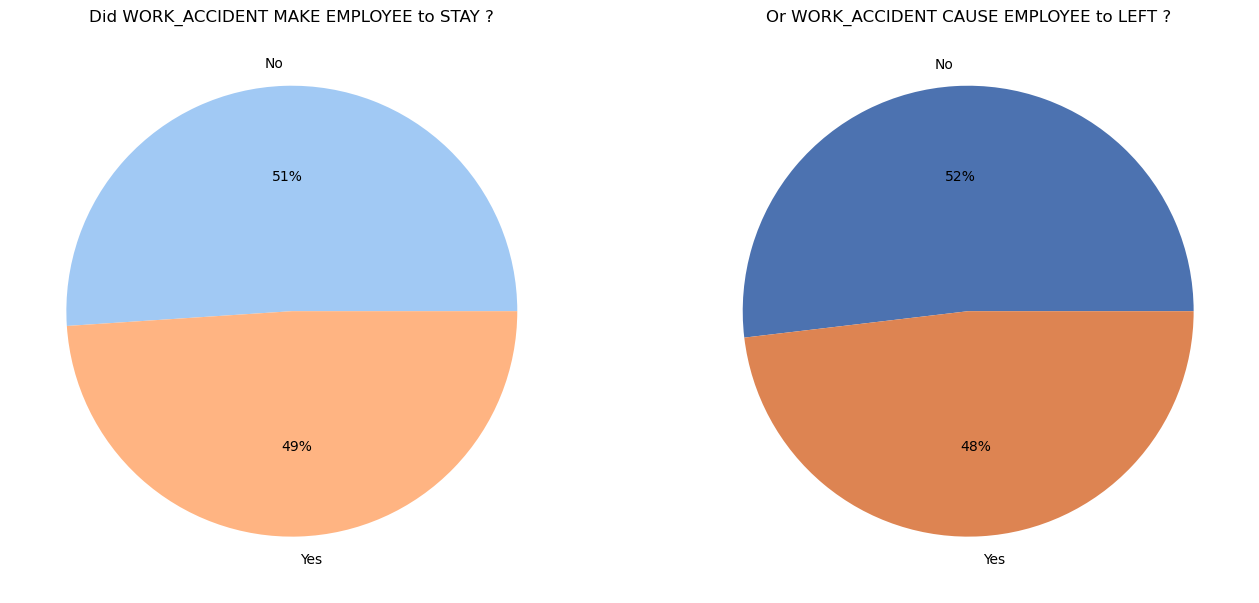

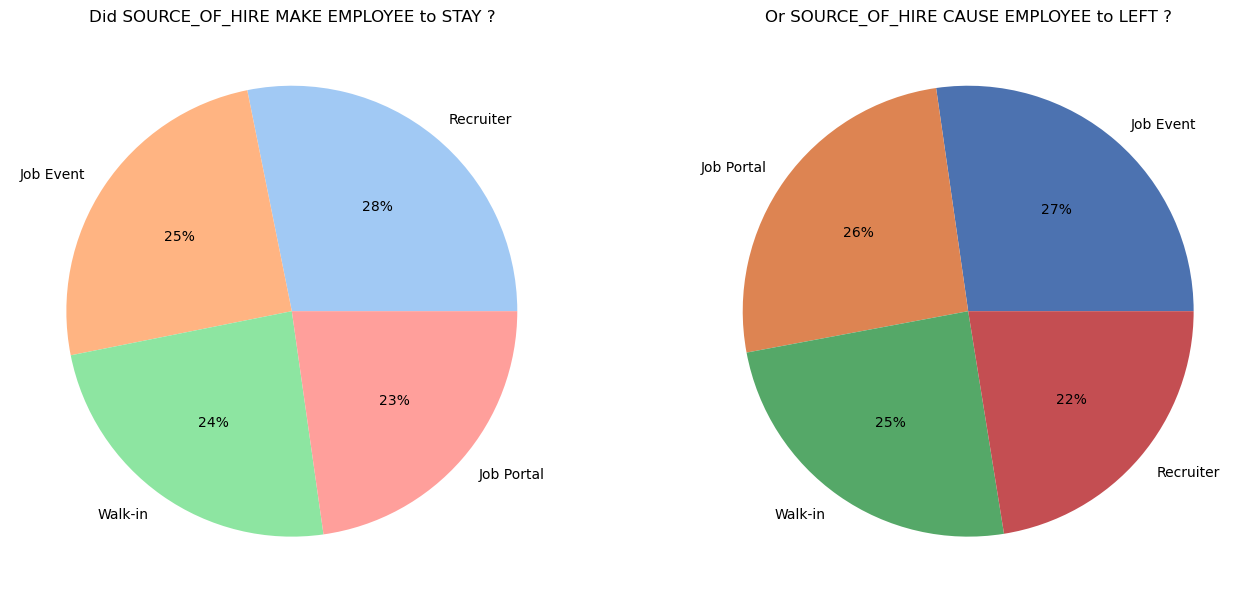

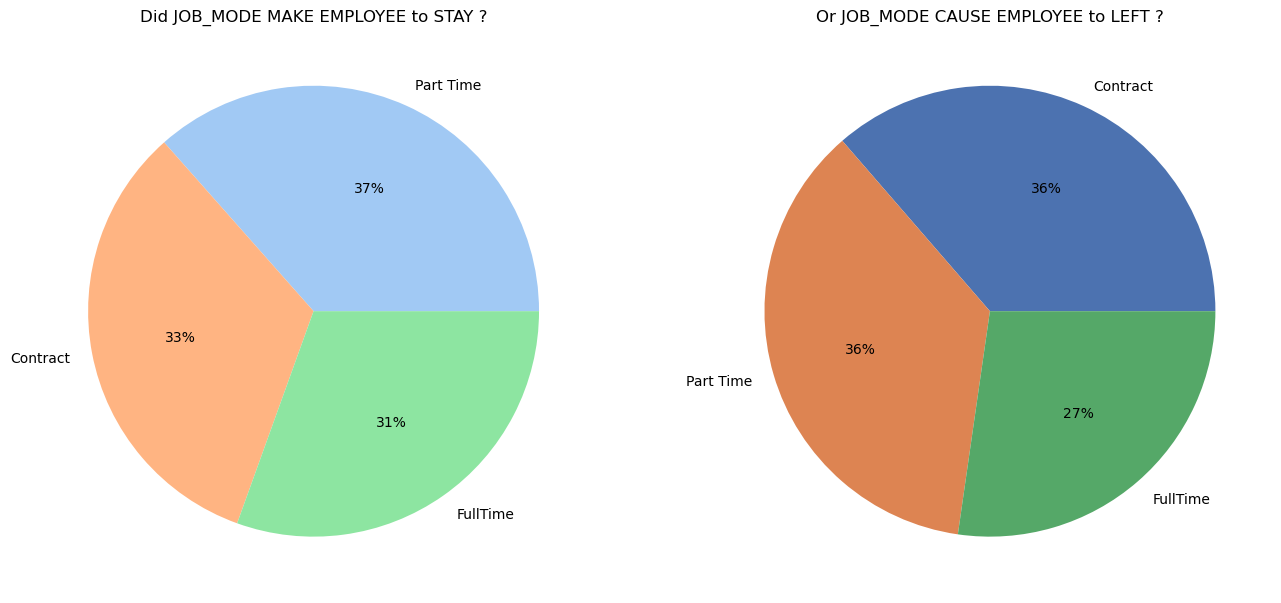

In [211]:
# namun pada piechart, data yang digunakan harus satu kesatuan data, maka dipisahkan dulu
stay_data = usecase_df[usecase_df['Attrition']=='No']
left_data = usecase_df[usecase_df['Attrition']=='Yes']

for smacat in small_categ:
    fig = plt.figure(figsize=(16, 8))

    # pie chart for employee stay
    staypie = fig.add_subplot(121)
    staypie.pie(stay_data[smacat].value_counts().values, labels=stay_data[smacat].unique(),
                autopct='%.0f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Did {str(smacat).upper()} MAKE EMPLOYEE to STAY ?')

    # pie chart for employee left
    leftpie = fig.add_subplot(122)
    leftpie.pie(left_data[smacat].value_counts().values, labels=left_data[smacat].unique(),
                autopct='%.0f%%', colors=sns.color_palette('deep'))
    plt.title(f'Or {str(smacat).upper()} CAUSE EMPLOYEE to LEFT ?')

untuk kategorikal yang jumlahnya banyak menggunakan bar chart
untuk kategorikal yang jumlahnya banyak menggunakan bar chart
- job level yang terendah kemungkinan karyawan untuk hengkang lebih besar
  - peringkat entry cenderung penyesuaian, percobaan dan proses adaptasi
  - apabila karyawan kurang puas atau kurang nyaman maka mempertimbangkan untuk keluar
- job role yang rentan ditinggali karyawan berasal dari teknisi lab, ilmuwan riset dan para sales
  - pekerjaan teknis dan saintifik terdapat tuntutan dan tanggung jawab yang besar sesuai kemampuan karyawan
  - begitu juga pekerjaan penjualan terdapat tuntutan agar penjualan produk sesuai target proyeksi bisnisnya
  - tuntutan dan tanggung jawab tidak jarang membuat kenyamanan karyawan menurun apabila berdampak ke mental karyawan
- num companies worked yang masih sedikit memungkinkan karyawan untuk hengkang
  - karena ada kemungkinan karyawan ingin mencoba tempat lain, atau terdapat tawaran lain
  - karyawan baru kerja juga terdapat faktor seperti gaji, peluang, pengaruh lingkungan, ruang berkembang
- percent salary hike yang semakin tinggi membuat karyawan cenderung menetap
  - sebaliknya karyawan yang kenaikan gajinya rendah cenderung tidak bertahan lama
  - karena gaji merupakan kebutuhan dasar yang harus terpenuhi menurut maslow, 
  - kenaikan gaji yang monoton cenderung rendah membuat karyawan jenuh, atau kurang diapresiasi 
- training time last year dari 2 - 3 tahun artinya sudah 2 tahun terakhir belum dapat pelatihan
  - pelatihan juga merupakan benefit agar karyawan dapat berkembang dan meningkat kemampuannya
  - karyawan yang kurang mendapat pelatihan menjadi kurang diperhatikan dan diapresiasi, sehingga memilih hengkang
- years at company yang kurang dari 2 - 5 tahun kemungkinan hengkangnya lebih besar
  - hal ini karena yang pengalaman kerja masih kurang berpikir untuk melihat peluang lain
  - atau karena pada proses percobaan atau adaptasi merasa kurang nyaman
- karyawan yang belum ada year since last promotion, artinya belum pernah dipromosi yang menimbulkan niat hengkang 
  - karyawan yang belum pernah mendapat promosi membuat dirinya mempertimbangkan buat keluar
  - sebaliknya karyawan yang sudah pernah mendapat promosi masa rawan hengkangnya dari 1 - 2 tahun 
- year with curr manager relatif memberikan pengaruh keinginan karyawan buat keluar
  - walaupun pada kasus ini ada yang kurang dari 1 tahun atau sudah 2 tahun dengan manager yang sama bekerjanya
- status of leaving paling umum terjadi karena pertimbangan gaji, keselamatan kerja dan tergantung kepala departemennya
  - ada pertimbangan karena mencari peluang ditempat lain yang lebih menarik
  - lingkungan yang stagnan dan tidak diberi kesempatan berkembang membuat karyawan memilih hengkang
  - lingkungan kerja yang tuntutan dan tekanannya yang berdampak pada kesehatan mental juga jadi penyebab


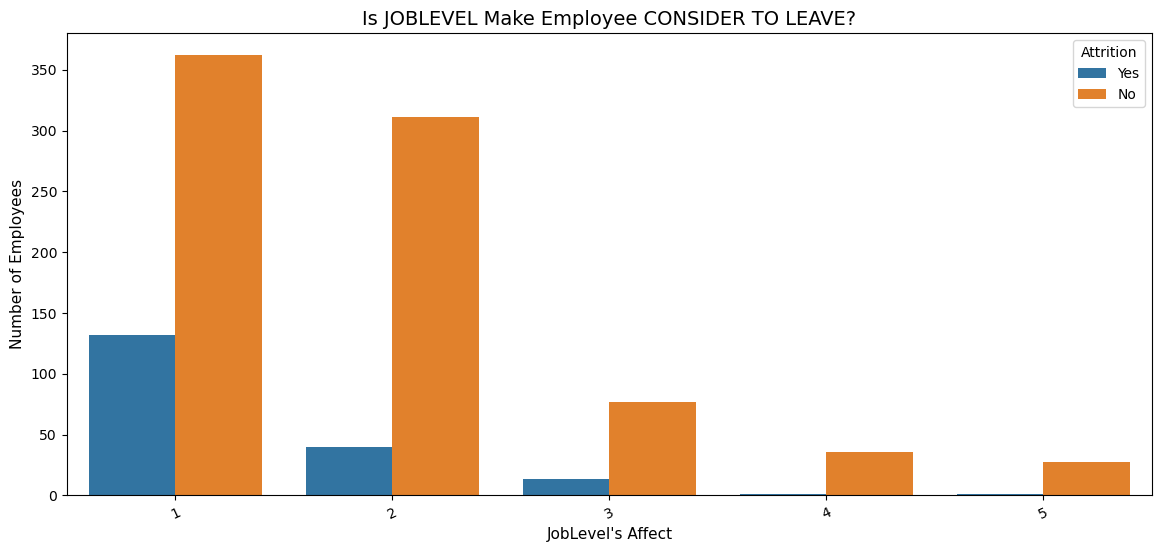

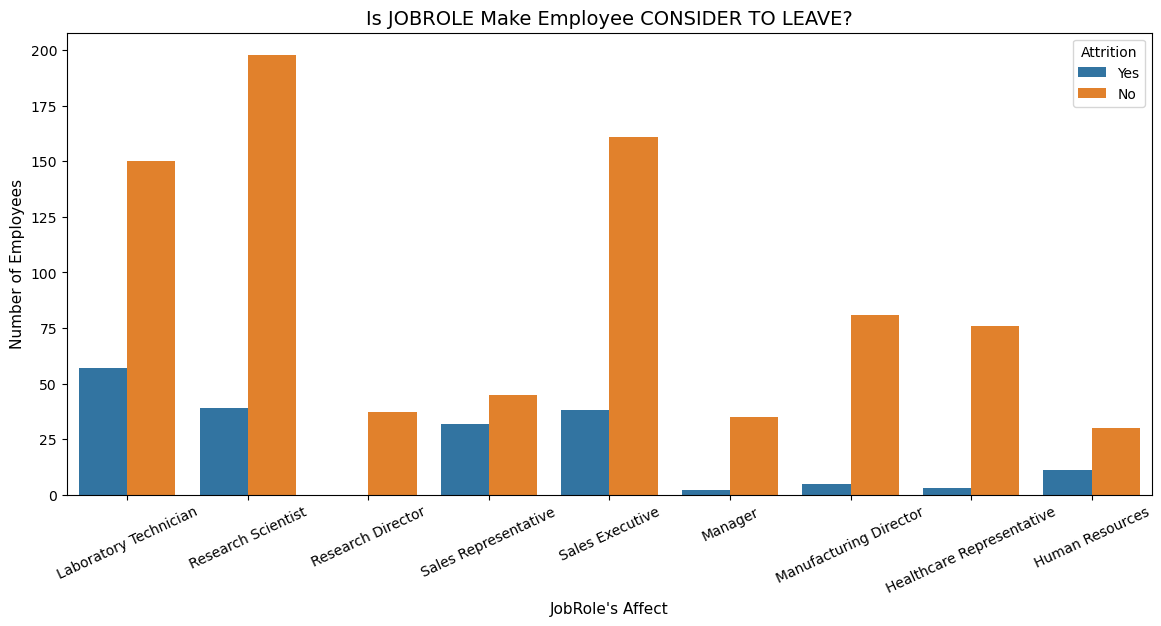

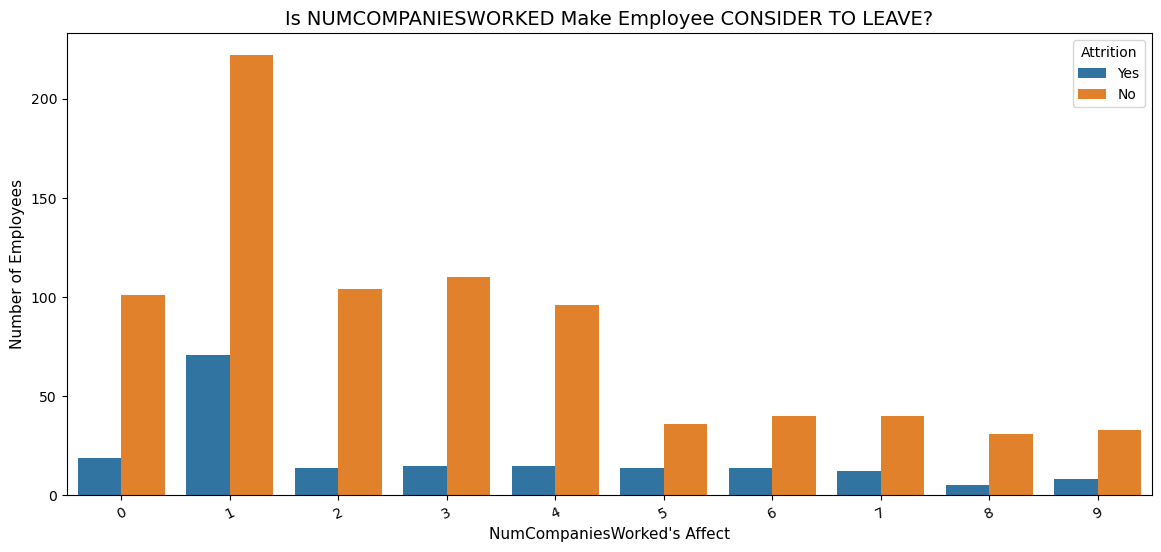

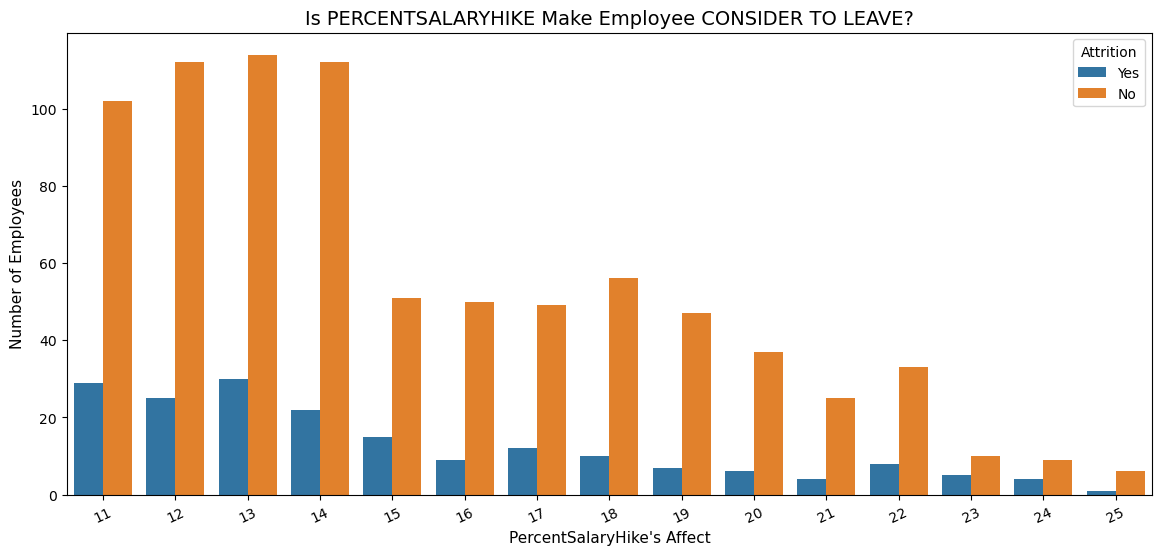

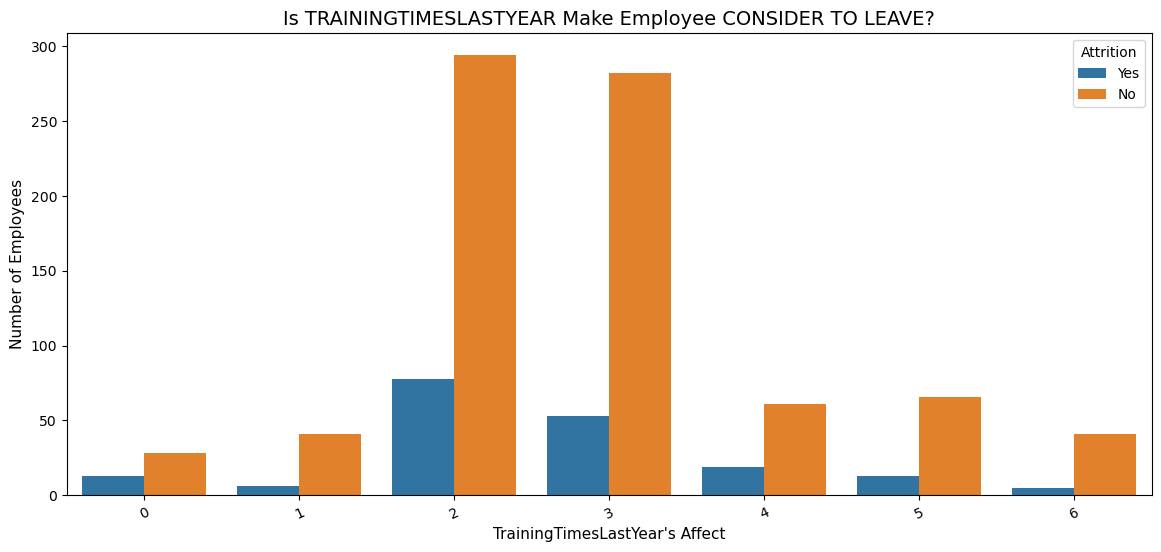

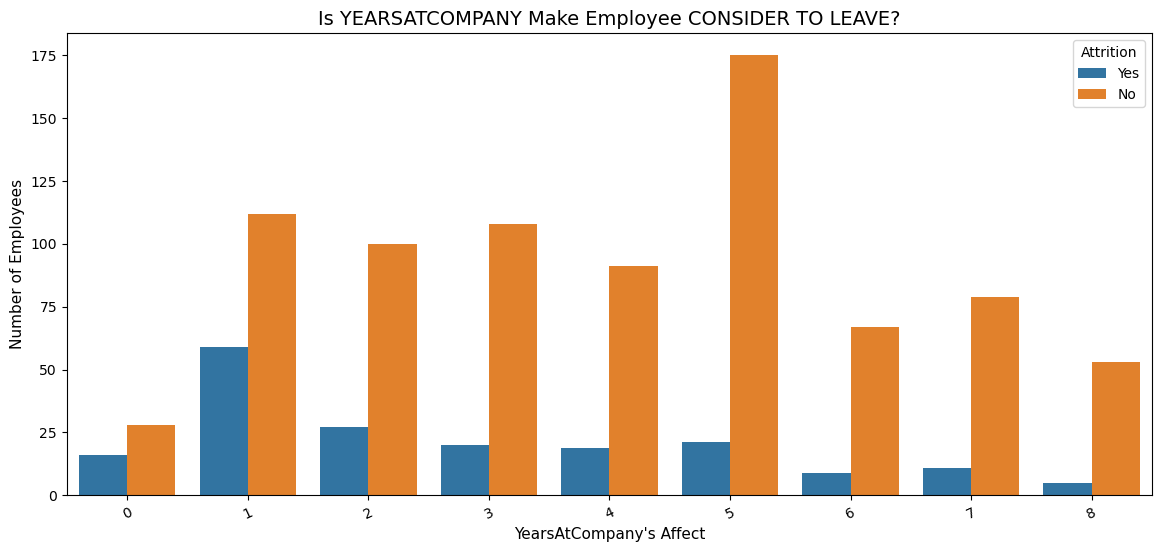

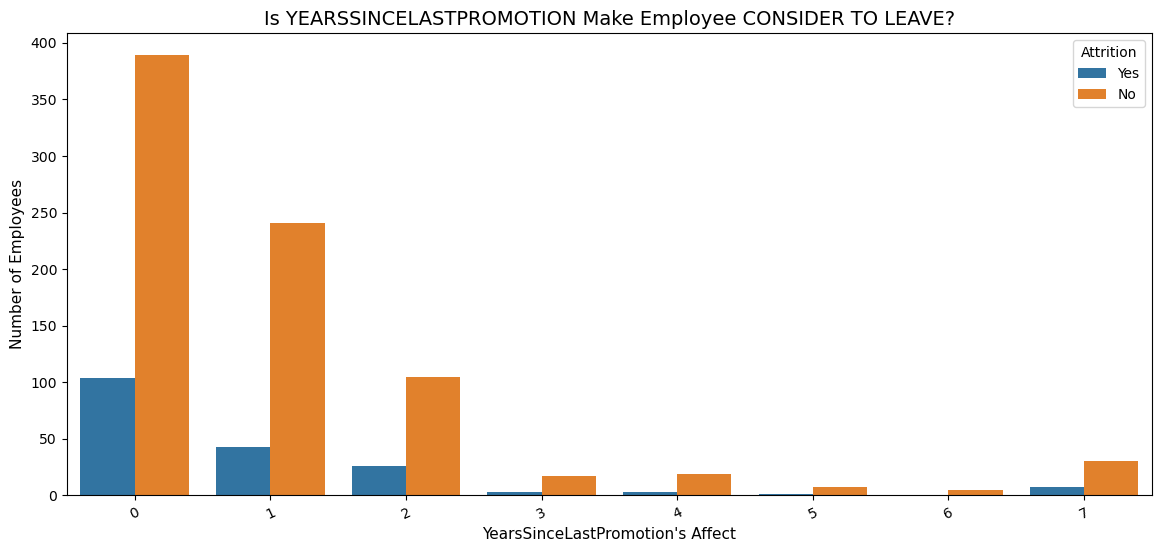

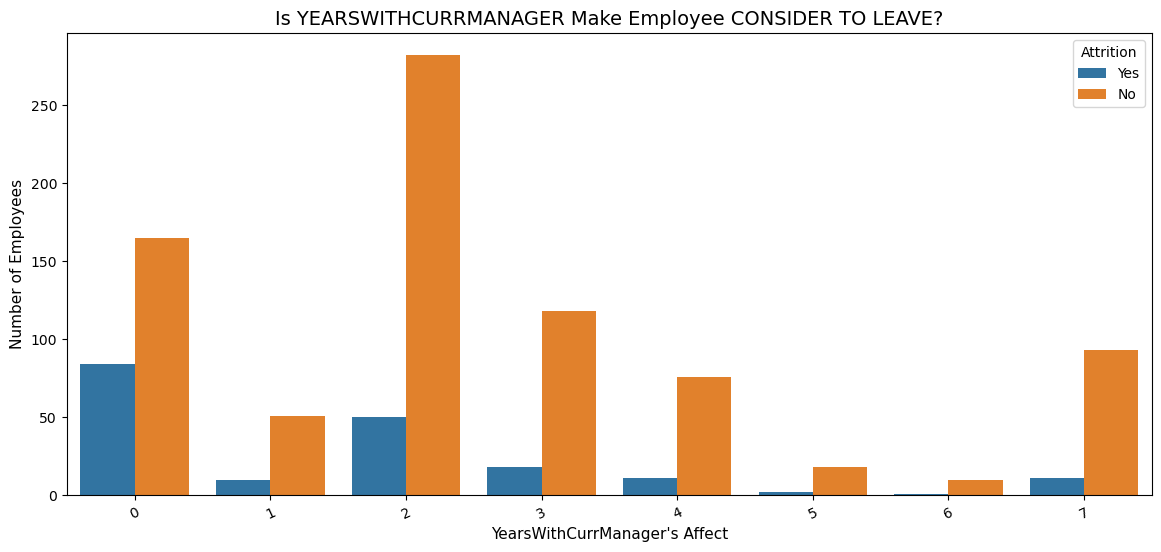

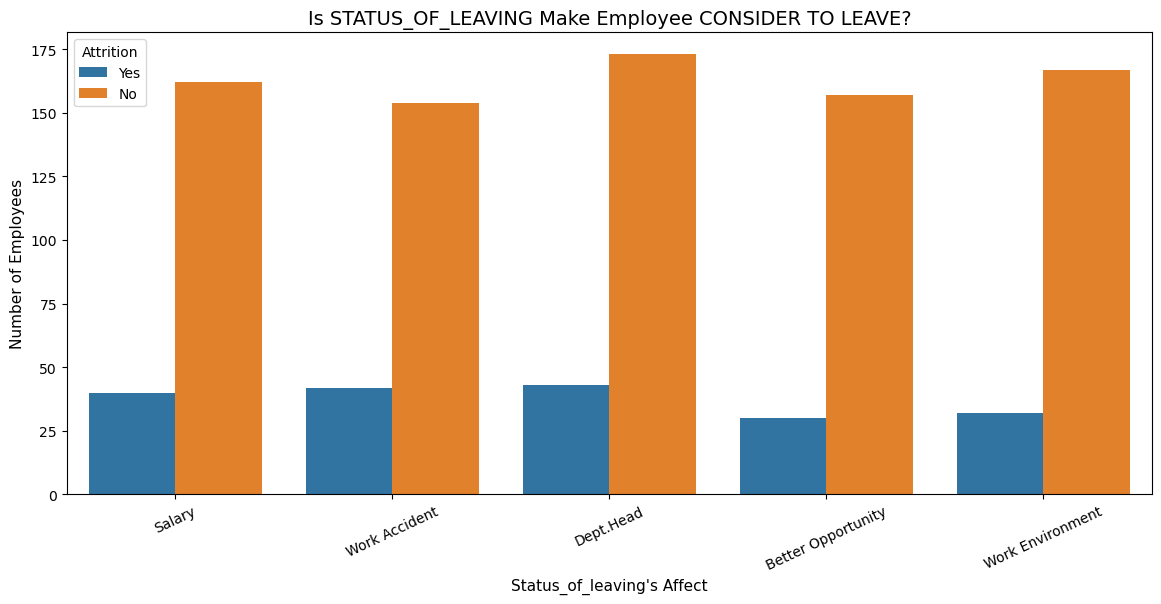

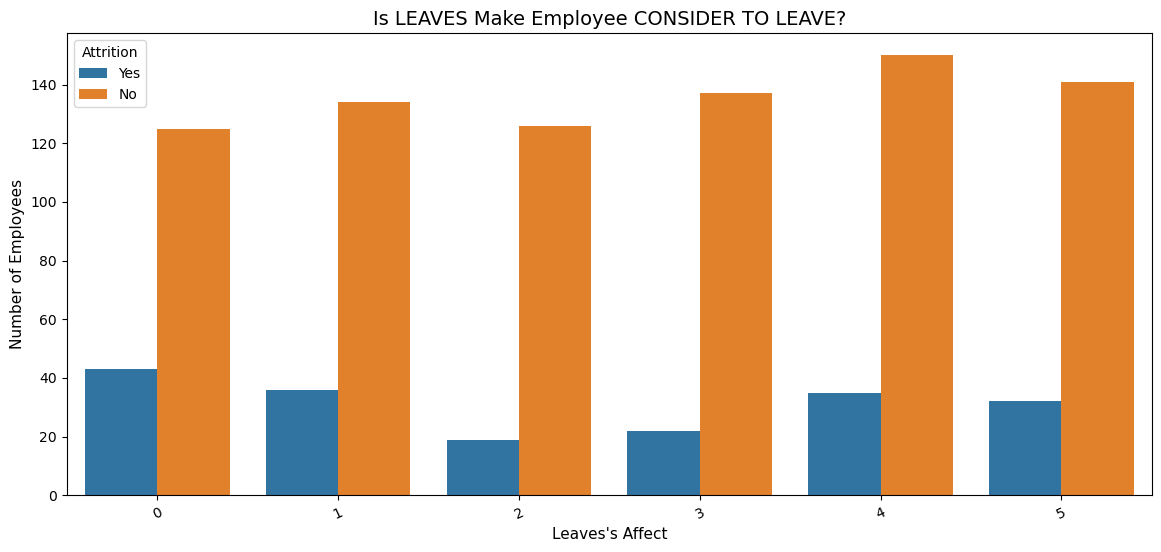

In [219]:
for bigcat in big_categ:
    plt.figure(figsize=(14,6))
    sns.countplot(x=bigcat, hue='Attrition', data=usecase_df)
    plt.title(f'Is {str(bigcat).upper()} Make Employee CONSIDER TO LEAVE?', fontsize=14)
    plt.xlabel(bigcat + '\'s Affect', fontsize=11)
    plt.ylabel('Number of Employees', fontsize=11)
    plt.xticks(rotation=25)

untuk numerikal yang menggunakan histogram
- age yang muda antara 20-30an kemungkinan hengkang lebih besar 
  - sedangkan yang tua cenderung menetap
  - karena yang muda cenderung melihat peluang lain dan ruang berkembang
- yang semakin kecil monthly income antara 2500-7000 cenderung hengkang 
  - sedangkan semakin besar gajinya cenderung menetap
  - karena yang gajinya rendah cenderung ingin yang lebih besar, sehingga menengok perusahaan lain
- yang total working years belum lama kurang dari 5 tahun masih mungkin akan churn
  - sementara semakin lama kerjanya, semakin cenderung menetap 
  - yang baru kerja masih kemungkinan ada penasaran untuk tempat kerja dan pengalaman lain

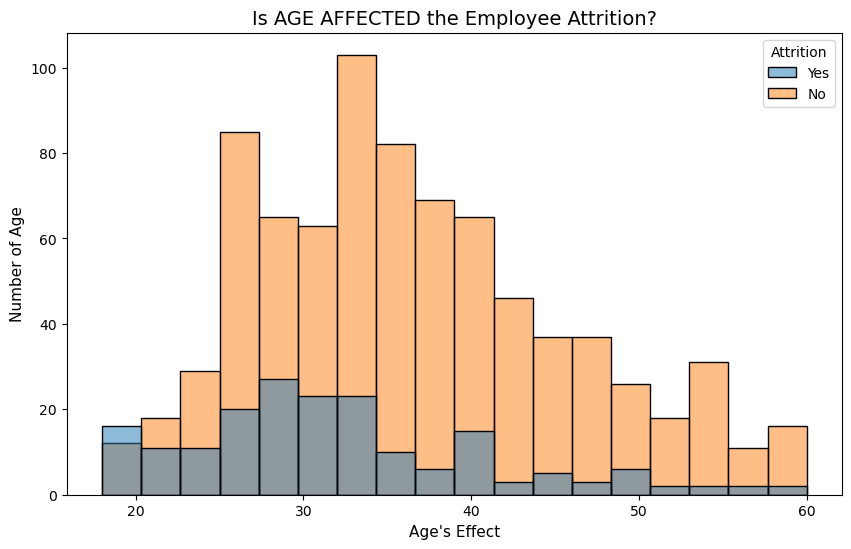

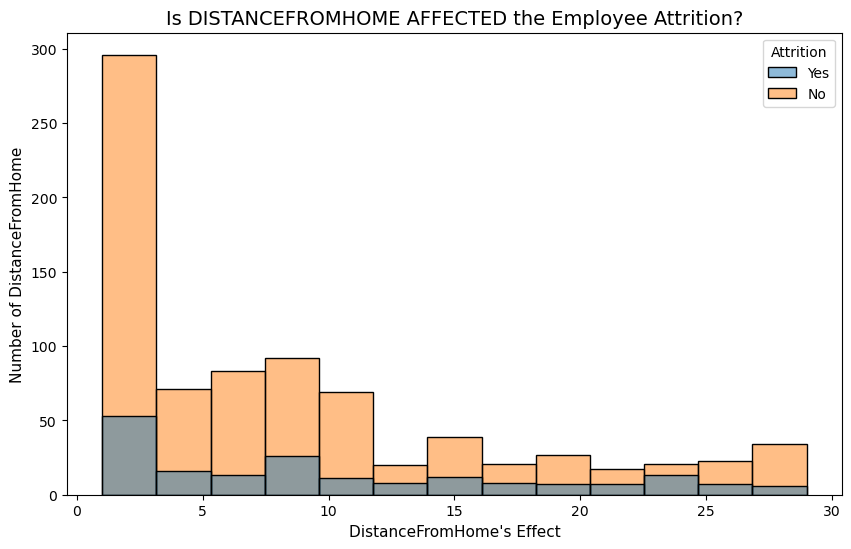

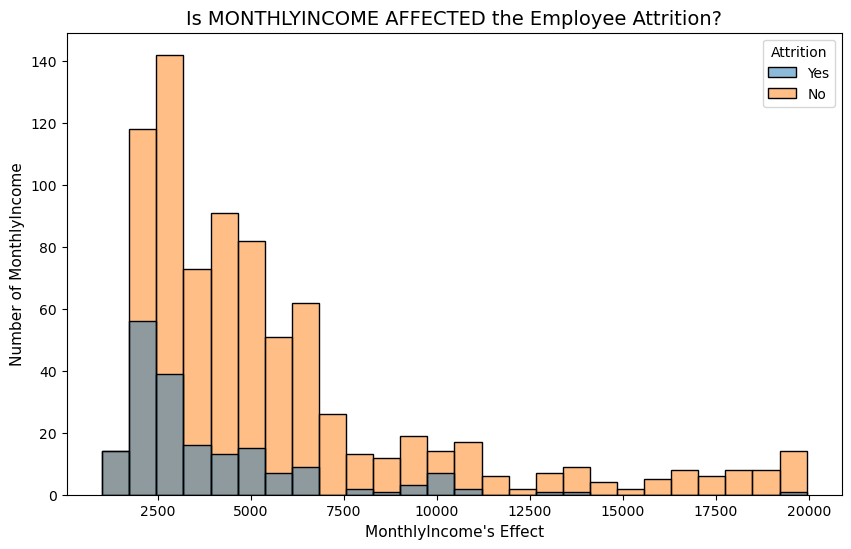

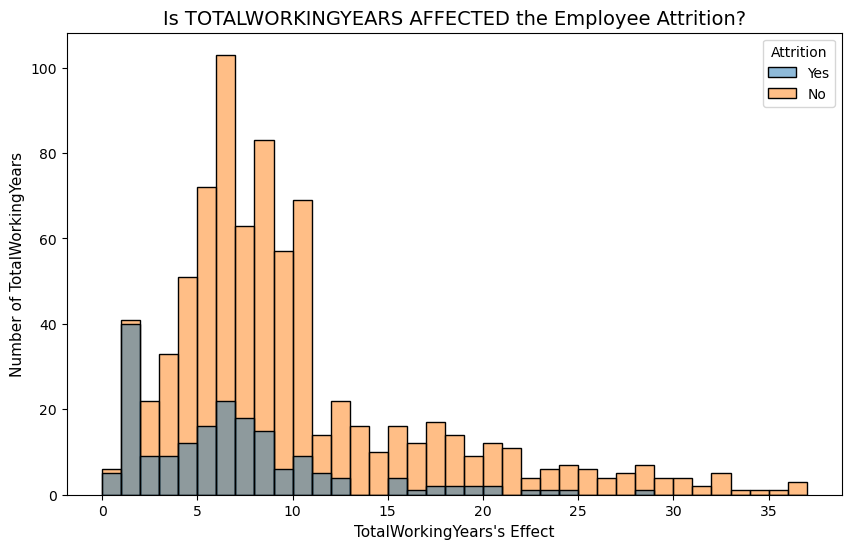

In [169]:
# numerikal menggunakan histplot
for numcol in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(x=numcol, hue='Attrition', data=usecase_df)
    plt.title(f'Is {str(numcol).upper()} AFFECTED the Employee Attrition?', fontsize=14)
    plt.xlabel(f'{numcol}\'s Effect', fontsize=11)
    plt.ylabel(f'Number of {numcol}', fontsize=11)

mengubah kolom kategorikal menjadi angka agar lebih diterima oleh model classifier

karena program lebih bisa menerima data berisi numerikal dari pada tulisan

In [9]:
le = LabelEncoder()

# ubah semua kategorikal jadi numerik dengan encoder
for obcol in usecase_df.columns:
    if usecase_df[obcol].dtype == 'object':
        usecase_df[obcol] = le.fit_transform(usecase_df[obcol])

usecase_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,1,1,1,2,1,2,1,2,3,...,0,0,1,2,0,4,2,0,0,0
1,21,0,1,1,15,1,3,1,6,4,...,0,0,1,3,1,5,2,0,2,2
2,45,0,1,1,6,1,3,3,5,1,...,0,0,3,1,1,1,3,0,0,0
3,23,0,1,2,2,1,3,1,8,1,...,0,0,2,3,0,1,0,1,2,1
4,22,0,1,1,15,0,3,1,2,4,...,0,0,2,0,1,5,2,0,0,0


menampilkan korelasi banyak variabel secara keseluruhan dengan label Attrition

berdasarkan korelasi multivariate ini kalau Overtime dan Marital Status yang menjadi pertimbangan terkuat kalau karyawan memutuskan hengkang  
- Karena karyawan yang bekerja overtime atau lebih banyak jam kerja dibanding yang wajar, maka mengakibatkan kelelahan dan tidak nyaman
- Marital Status juga menjadi pertimbangan karena seiring keperluan waktu berkeluarga yang lebih banyak 

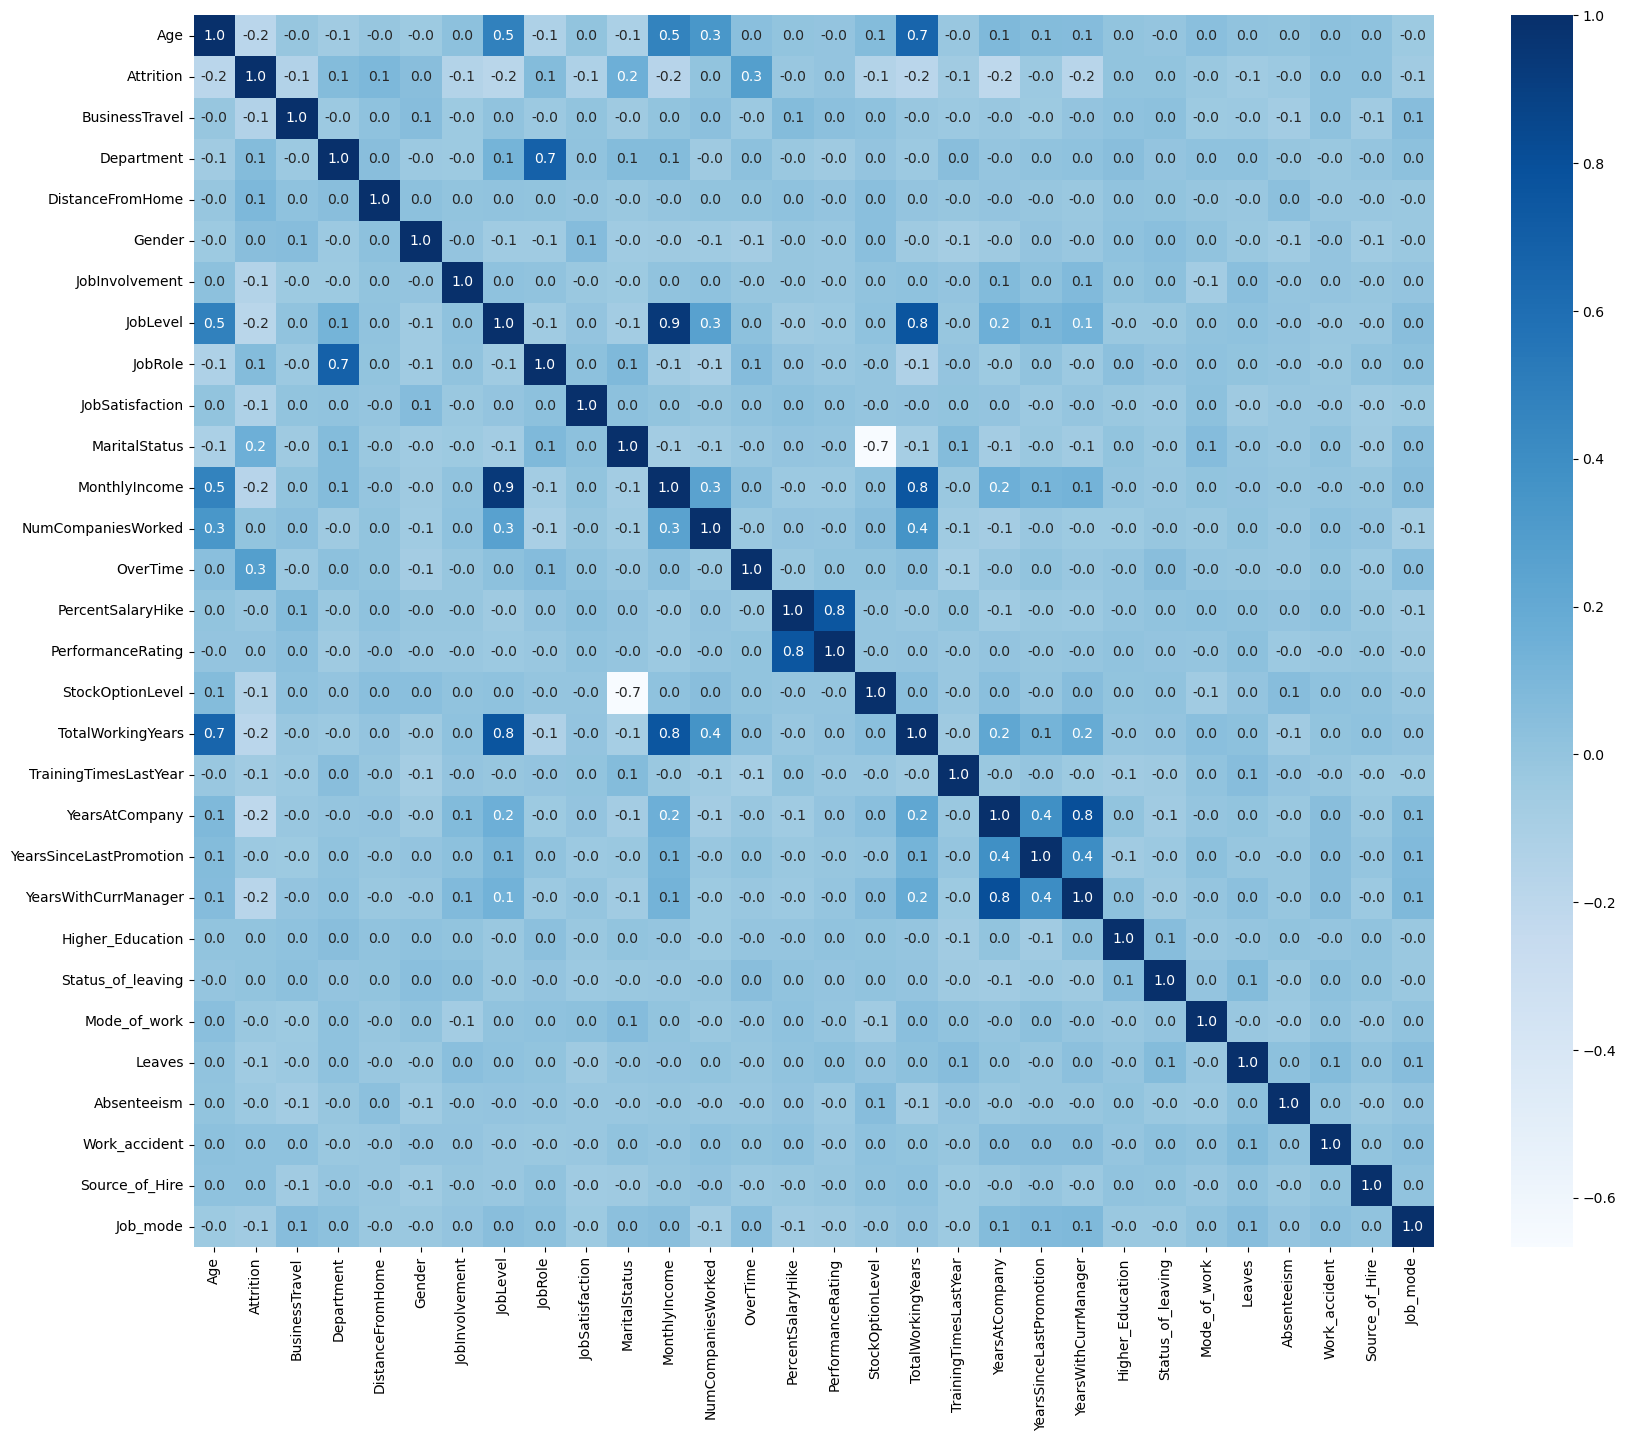

In [10]:
# korelasi semua variabel dengan heatmap
plt.figure(figsize=(20,16))
sns.heatmap(usecase_df.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.show()

# # jika perlu scaling data dengan minmax scaler
# temp_scaled = usecase_df.copy()
# temp_scaled = minmax.fit_transform(temp_scaled) 
# pd.DataFrame(data=temp_scaled, columns=usecase_df.columns).round(2)
# plt.figure(figsize=(20,16))
# sns.heatmap(pd.DataFrame(data=temp_scaled, columns=usecase_df.columns).corr(), annot=True, fmt='.1f', cmap='Blues')

Pembagian Data menjadi Train dan Test 
- data test dibagi dengan proporsi sebanyak 25 persen dari seluruh data
- data train dibagi dengan proporsi sebanyak 75 persen dari seluruh data

untuk data non label dilakukan scaling dengan minmax untuk standarisasi data agar semua data bernilai setara, agar mudah dimengerti model

In [11]:
minmax = MinMaxScaler()

X = usecase_df.drop(columns='Attrition')
# scaling data agar semua data bernilai sama sehingga mudah dimengerti oleh model 
X_scaled = X.copy()
X_scaled = minmax.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
y = usecase_df['Attrition'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0, shuffle=True)

print(f"""Train Shape : {X_train.shape[0]} Rows and {X_train.shape[1]} Columns (with {y_train.shape[0]} labels)
Train Shape : {X_test.shape[0]} Rows and {X_test.shape[1]} Columns (with {y_test.shape[0]} labels)""")

Train Shape : 750 Rows and 29 Columns (with 750 labels)
Train Shape : 250 Rows and 29 Columns (with 250 labels)


Confusion Matrix (Vertikal = Predicted, Horizontal = Actual)
- TP / True Positive - Positive Predicted Positive Actual (1,1), diprediksi bener karena data positif diprediksi positif
- TN / True Negative - Negative Predicted Negative Actual  (0,0), diprediksi bener karena data negatif diprediksi negatif
- FP / False Positive - Positive Predicted Negative Actual (1,0), diprediksi salah karena data yg negatif diprediksi positif
- FN / False Negative - Negative Predicted Positive Actual (0,1), diprediksi salah karena data yg positif diprediksi negatif

kalau versi python cukup liat 1 ama 0 nya, dimana 1 Positive, 0 negative
- 1 Ver = Positive Predicted, 0 Ver = Negative Predicted 
- 1 Hor = Positive Actual, 0 Hor = Negative Actual

Gunakan model Logistic Regression Classifier

Hasil Prediksi
- 198 karyawan diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 17 karyawan diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 27 karyawan diprediksi hengkang (1) tenyata tidak hengkang (0)
- 8 Karyawan diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       206
           1       0.68      0.39      0.49        44

    accuracy                           0.86       250
   macro avg       0.78      0.67      0.71       250
weighted avg       0.84      0.86      0.84       250



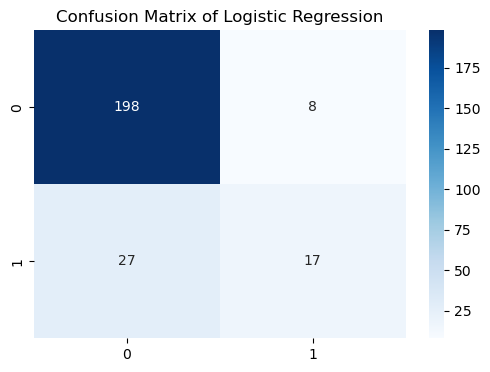

In [12]:
loreg = LogisticRegression()
loreg.fit(X_train, y_train)
lrg_pred = loreg.predict(X_test)

# Classification Report dan Confusion Matrix
print(f'Classification Report of Logistic Regression:\n{classification_report(y_test, lrg_pred)}')
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, lrg_pred),  annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression', fontsize=12)
plt.show()

Gunakan model Random Forest Classifier

Hasil Prediksi
- 205 karyawan diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 9 karyawan diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 34 karyawan diprediksi hengkang (1) tenyata tidak hengkang (0)
- 1 atau tidak ada Karyawan diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       206
           1       0.86      0.14      0.24        44

    accuracy                           0.84       250
   macro avg       0.85      0.57      0.57       250
weighted avg       0.85      0.84      0.79       250



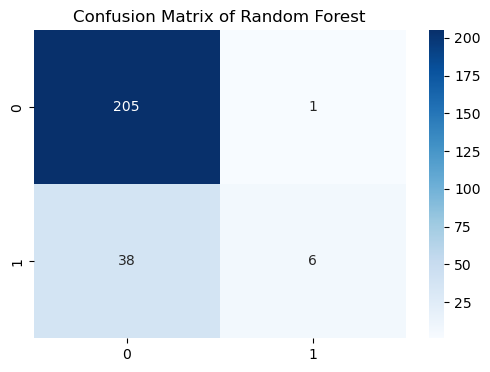

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# Classification Report dan Confusion Matrix
print(f'Classification Report of Random Forest:\n{classification_report(y_test, rfc_pred)}')
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rfc_pred),  annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of Random Forest', fontsize=12)
plt.show()

Gunakan model K-Nearest Neighbour Classifier

mencari neighbors yang menampilkan performa terbaik menggunakan perulangan sesuai rentang 1-15
- setiap hasil dari tiap pengulangan dihitung menggunakan accuracy_score pda umumnya, kemudian ditotal
- titik dengan perhitungan score accuracy terbaik menjadi yang terpilih, yaitu di K-4

Max Accuracy is 0.856 from K-4


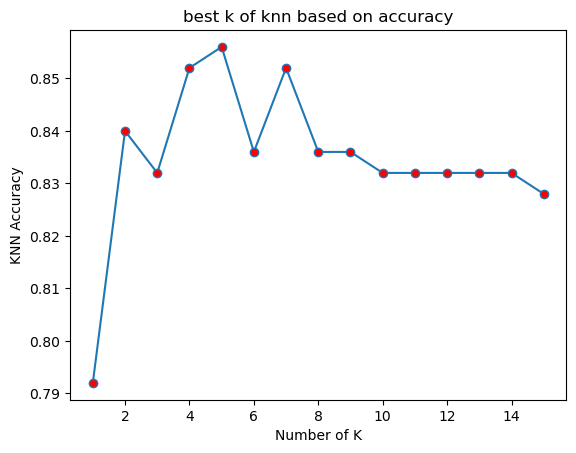

In [10]:
knn_score = []

for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    X_pred = knn.predict(X_test)
    knn_score.append(accuracy_score(y_test, X_pred))

plt.plot(range(1,16), knn_score, marker='o', markerfacecolor='red')
plt.title('best k of knn based on accuracy')
plt.ylabel('KNN Accuracy')
plt.xlabel('Number of K')

print(f'Max Accuracy is {max(knn_score)} from K-{knn_score.index(max(knn_score))}')

Hasil Prediksi
- 206 karyawan diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 7 karyawan diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 37 karyawan diprediksi hengkang (1) tenyata tidak hengkang (0)
- 0 Karyawan diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of K-Nearest Neightbor:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       206
           1       1.00      0.16      0.27        44

    accuracy                           0.85       250
   macro avg       0.92      0.58      0.60       250
weighted avg       0.87      0.85      0.80       250



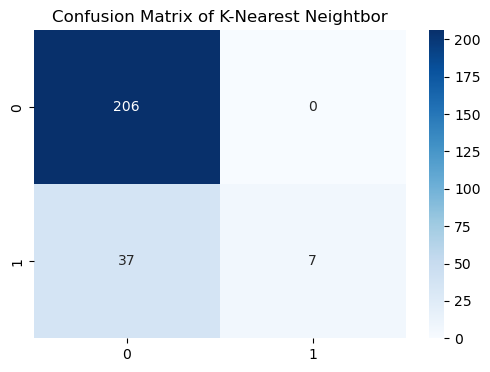

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Classification Report dan Confusion Matrix
print(f'Classification Report of K-Nearest Neightbor:\n{classification_report(y_test, knn_pred)}')
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, knn_pred),  annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of K-Nearest Neightbor', fontsize=12)
plt.show()

Hyperparameter Tunning   
digunakan untuk meningkatkan performa model dengan memasukan hyperparameter ke model
- parameter yang dimasukan berdasarkan yang dipilih oleh grid search
- umumnya parameter tunning menggunakan grid search memerlukan waktu yang lama sekitar 1-3 jam

In [51]:
# hyperparameter tunning logistic regression
loreg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'penalty': ['l1', 'l2', 'elasticnet', None],
              'solver': ['lbfgs','sag', 'newton-cg']}
loreg_gs = GridSearchCV(estimator=loreg, param_grid=loreg_params, cv=2, verbose=2)
loreg_gs.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.0001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.0001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.0001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=0.0001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, so

c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..................C=100, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...................

c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ..................C=10000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=10000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=10000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=10000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..............C=10000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=10000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=10000, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=10000, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..............C=10000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=100

c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Hendry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'sag', 'newton-cg']},
             verbose=2)

In [52]:
# print best params and best estimators
print(f"""Loreg Grid Search Best Parameter: {loreg_gs.best_params_}
Loreg Grid Search Best Estimator: {loreg_gs.best_estimator_}
Loreg Grid Search Best Score: {loreg_gs.best_score_}""")

# current params {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', }

Loreg Grid Search Best Parameter: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Loreg Grid Search Best Estimator: LogisticRegression(C=1)
Loreg Grid Search Best Score: 0.8440000000000001


In [57]:
# hyperparameter tunning random forest
rf_param = {'bootstrap':[True], 'max_depth':list(range(10,160,10)), 
            'max_features':list(range(1,16,1)), 'n_estimators':list(range(100,1600,100)), 
            'min_samples_leaf':list(range(1,6,1)), 'min_samples_split':list(range(2,20,2))}
rf_gs = GridSearchCV(estimator=rfc, param_grid=rf_param, refit=True,n_jobs=-1, verbose=3, cv=3)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 151875 candidates, totalling 455625 fits


KeyboardInterrupt: 

In [ ]:
# print best params and best estimators
print(f"""Random Forest Grid Search Best Parameter: {rf_gs.best_params_}
Random Forest Grid Search Best Estimator: {rf_gs.best_estimator_}
Random Forest Grid Search Best Score: {rf_gs.best_score_}""")

In [ ]:
# hyperparameter tunning k-nearest neighbour
knn_params = {'n_neighbors':list(range(1,31)), 'leaf_size':list(range(10,160,10)), 'weights':['uniform', 'distance'], 
              'metric':['minkowski', 'euclidean', 'manhattan'], 'algorithm':['ball_tree', 'kd_tree', 'brute']}
knn_gs = GridSearchCV(estimator=knn, param_grid=knn_params,n_jobs=-1, verbose=1, cv=3)
knn_gs.fit(X_train, y_train)

In [ ]:
# print best params and best estimators
print(f"""KNN Grid Search Best Parameter: {knn_gs.best_params_}
KNN Grid Search Best Estimator: {knn_gs.best_estimator_}
KNN Grid Search Best Score: {knn_gs.best_score_}""")

Pake Model dari hasil Hyperparameter Tunning

Cari Feature Terpenting yang berpengaruh kuat pada Model Prediktif
- Dari ketiga model diatas, OVERTIME konsisten berada di 3 peringkat teratas dibanding Feature lain yang selalu berubah2
- Sama seperti hasil pada Korelasi Multivariable antara Attrition dengan Semua kolom, kalau Overtime muncul paling Atas
- menandakan Overtime lah Feature Importances yang juga menjadi faktor terkuat mengapa Karyawan memilih Keluar
- Overtime menjadi Alasan Kuat untuk Hengkang, karena membuat Karyawan tidak nyaman bekerja dengan tanggung jawab berlebih dari yang seharusnya

In [99]:
# feature importances of logistic regression
loreg_import = pd.DataFrame({'Columns':X_train.columns, 'Coefficient':loreg.coef_[0]})
loreg_import.sort_values(by='Coefficient', ascending=False, inplace=True)
loreg_import.round(3).head(10)

,Columns,Coefficient
12,OverTime,1.852
3,DistanceFromHome,0.955
9,MaritalStatus,0.913
2,Department,0.882
11,NumCompaniesWorked,0.800
19,YearsSinceLastPromotion,0.767
26,Work_accident,0.419
4,Gender,0.385
21,Higher_Education,0.068
14,PerformanceRating,0.019


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

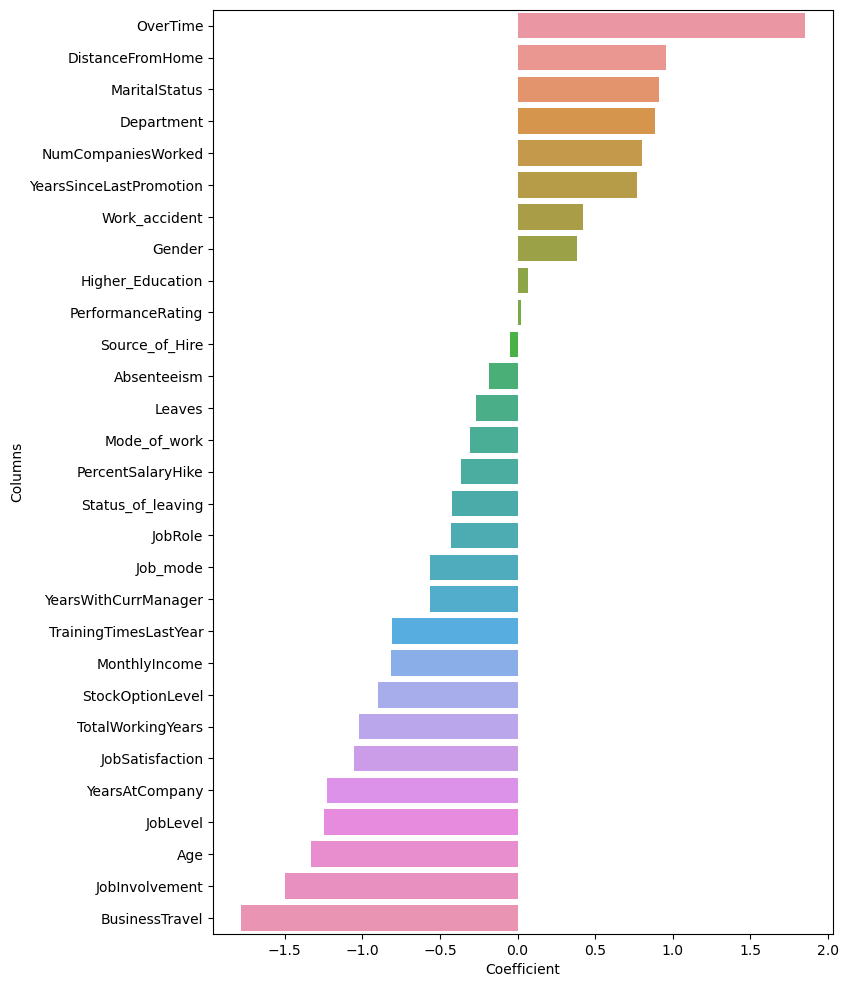

In [101]:
plt.figure(figsize=(8,12))
sns.barplot(x='Coefficient', y='Columns', data=loreg_import)

In [98]:
# feature importances of random forest
rfc_import = pd.DataFrame({'Columns':X_train.columns, 'Coefficient':rfc.feature_importances_})
rfc_import.sort_values(by='Coefficient', ascending=False, inplace=True)
rfc_import.round(3).head(10)

,Columns,Coefficient
10,MonthlyIncome,0.088
0,Age,0.076
12,OverTime,0.071
16,TotalWorkingYears,0.058
3,DistanceFromHome,0.056
13,PercentSalaryHike,0.045
11,NumCompaniesWorked,0.042
7,JobRole,0.038
18,YearsAtCompany,0.037
20,YearsWithCurrManager,0.037


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

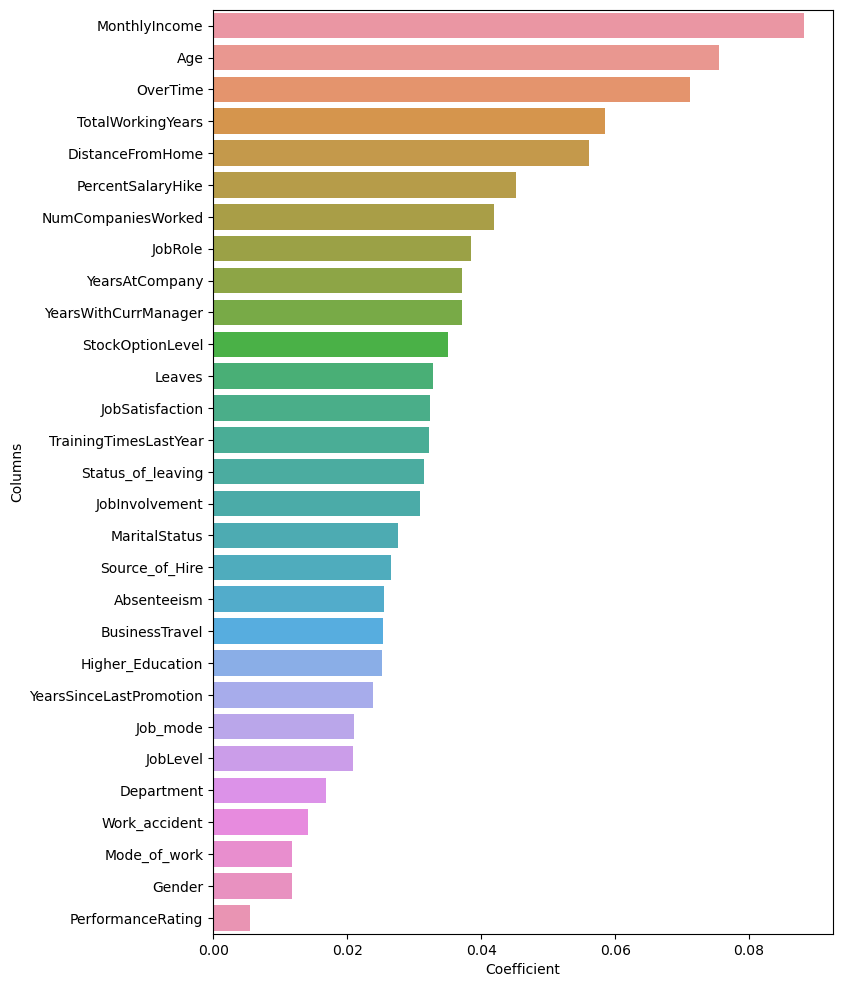

In [97]:
plt.figure(figsize=(8,12))
sns.barplot(x='Coefficient', y='Columns', data=rfc_import)

In [103]:
# feature importances of k-nearest neighbor
knn_perim = permutation_importance(knn, X_test, y_test, scoring='accuracy').importances_mean
knn_import = pd.DataFrame({'Columns':X_train.columns, 'Coefficient':knn_perim})
knn_import.sort_values(by='Coefficient', ascending=False, inplace=True)
knn_import.round(3).head(10)

,Columns,Coefficient
12,OverTime,0.023
22,Status_of_leaving,0.021
25,Absenteeism,0.018
26,Work_accident,0.017
18,YearsAtCompany,0.016
3,DistanceFromHome,0.016
17,TrainingTimesLastYear,0.013
28,Job_mode,0.013
5,JobInvolvement,0.013
7,JobRole,0.011


<AxesSubplot:xlabel='Coefficient', ylabel='Columns'>

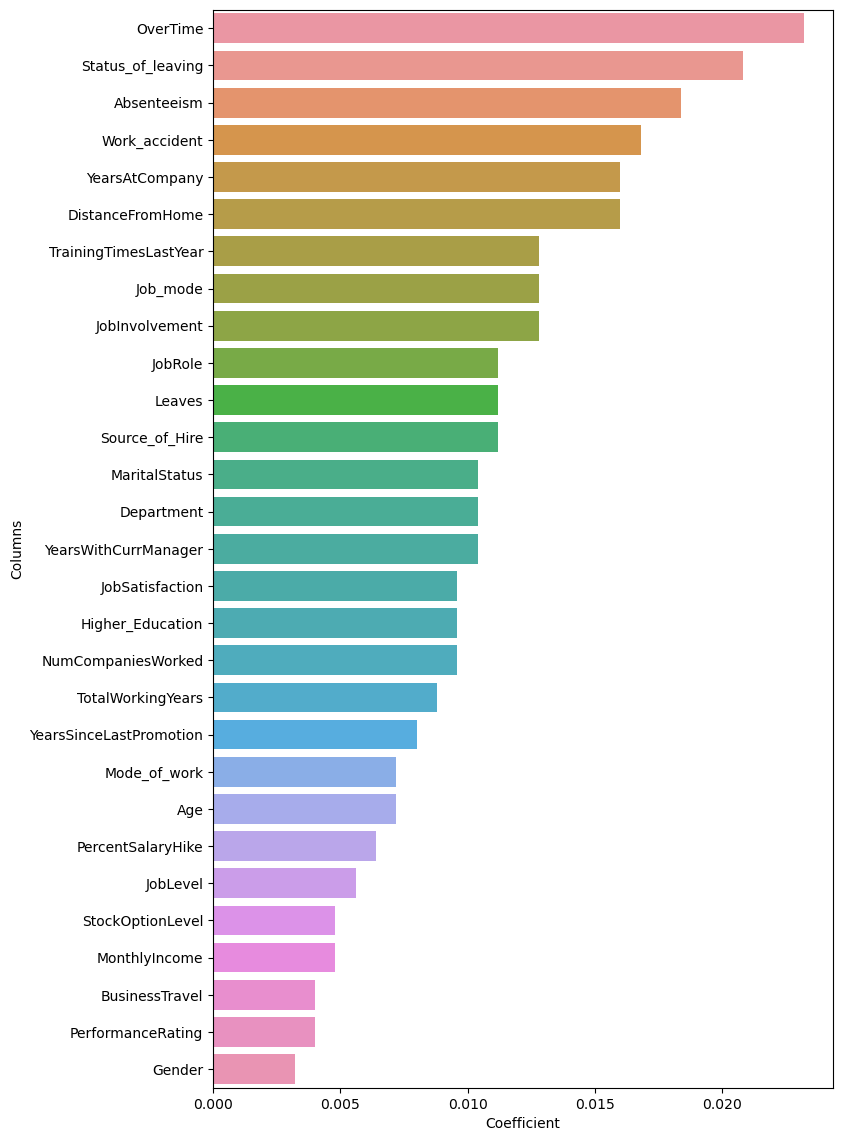

In [104]:
plt.figure(figsize=(8,14))
sns.barplot(x='Coefficient', y='Columns', data=knn_import)

Bandingkan Model dengan Akurasi yag terbaik setelah hypertuning

In [59]:
lrg_acc = accuracy_score(y_test, lrg_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)
knn_acc = accuracy_score(y_test, knn_pred)

model_acc = pd.DataFrame(data={'Model':['Logistic Regression', 'Random Forest', 'K-Nearest Neighbor'], 
                               'Score':[lrg_acc, rfc_acc, knn_acc]})
model_acc.sort_values(by='Score', ascending=False, inplace=True)
model_acc.round(2)

,Model,Score
1,Random Forest,0.86
0,Logistic Regression,0.86
2,K-Nearest Neighbor,0.85


Baca Datatest

In [105]:
realcase_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
1000,52,Travel_Rarely,Sales,5,Male,3,3,Sales Executive,2,Single,...,PHD,13-02-2013,NaN,Salary,OFFICE,4,0,Yes,Job Event,FullTime
1001,39,Travel_Rarely,Research & Development,18,Male,3,2,Manufacturing Director,3,Single,...,Graduation,03-01-2013,NaN,Dept.Head,OFFICE,3,0,Yes,Job Event,Contract
1002,34,Travel_Rarely,Research & Development,29,Male,3,2,Laboratory Technician,3,Married,...,Graduation,01-05-2013,NaN,Better Opportunity,OFFICE,3,1,No,Recruiter,FullTime
1003,27,Travel_Rarely,Research & Development,17,Female,3,1,Research Scientist,3,Single,...,12th,04-02-2013,NaN,Better Opportunity,WFH,1,0,Yes,Walk-in,Contract
1004,29,Travel_Frequently,Research & Development,14,Female,3,3,Healthcare Representative,4,Single,...,Post-Graduation,24-01-2013,NaN,Work Accident,WFH,1,2,Yes,Walk-in,FullTime


baca jumlah baris, kolom dan liat informasi dari datasetnya

In [109]:
# dataset rows and columns
print(realcase_df.shape)
# dataset info
print(realcase_df.info())

(470, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 1000 to 1469
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      470 non-null    int64  
 1   BusinessTravel           470 non-null    object 
 2   Department               470 non-null    object 
 3   DistanceFromHome         470 non-null    int64  
 4   Gender                   470 non-null    object 
 5   JobInvolvement           470 non-null    int64  
 6   JobLevel                 470 non-null    int64  
 7   JobRole                  470 non-null    object 
 8   JobSatisfaction          470 non-null    int64  
 9   MaritalStatus            470 non-null    object 
 10  MonthlyIncome            470 non-null    int64  
 11  NumCompaniesWorked       470 non-null    int64  
 12  OverTime                 470 non-null    object 
 13  PercentSalaryHike        470 non-null    int64  
 14  PerformanceR

deskripsi statistik dataset antara numerik secara default hingga object categorical

In [110]:
# statistical data description for numerical 
realcase_df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,0.0,470.000000,470.000000
mean,39.859574,9.629787,2.719149,2.723404,2.755319,8981.306383,2.161702,15.185106,3.165957,0.846809,16.423404,2.825532,13.878723,4.665957,7.842553,NaN,2.625532,1.523404
std,8.005426,8.429765,0.676955,1.108258,1.099391,5137.930490,2.354377,3.886694,0.372439,0.834964,7.385623,1.262628,6.100803,4.263335,3.195262,NaN,1.677706,1.097820
min,27.000000,1.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,11.000000,3.000000,0.000000,8.000000,0.000000,8.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,34.000000,2.000000,2.000000,2.000000,2.000000,4922.250000,1.000000,12.000000,3.000000,0.000000,10.000000,2.000000,10.000000,1.000000,7.000000,NaN,1.000000,1.000000
50%,39.000000,7.000000,3.000000,3.000000,3.000000,7570.000000,1.000000,14.000000,3.000000,1.000000,14.000000,3.000000,11.000000,4.000000,8.000000,NaN,3.000000,1.000000
75%,45.000000,15.000000,3.000000,3.000000,4.000000,12142.000000,3.000000,18.000000,3.000000,1.000000,21.000000,3.000000,17.000000,7.000000,9.000000,NaN,4.000000,2.750000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000


In [111]:
# # statistical data description for categorical
realcase_df.describe(include='object')

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
count,470,470,470,470,470,470,470,470,470,470,470,470,470
unique,3,3,2,9,3,2,4,409,5,2,2,4,3
top,Travel_Rarely,Research & Development,Male,Sales Executive,Married,No,Post-Graduation,14-06-2012,Dept.Head,WFH,Yes,Job Event,Contract
freq,322,294,275,127,239,350,129,4,98,241,239,127,166


Persiapan Temp Data Test sebelum Penerapan Model

terdiri dari proses data cleansing dan data preprocessing yang sama dengan data sebelumnya

In [112]:
X_real = realcase_df.copy()

X_real.drop(columns=['Date_of_Hire', 'Date_of_termination'], inplace=True)

temp_bustrav2 = X_real['BusinessTravel'].str.split('_', n=1, expand=True)
# hapus kolom yg isinya travel
X_real['TravelOnly'] = temp_bustrav2[0]
X_real['NewBusTrav'] = temp_bustrav2[1]

# delete column yg tidak perlu dengan inplace True
X_real.drop(columns=['BusinessTravel', 'TravelOnly'], inplace=True)
# kolom businesstravel yg temp dijadiin yg baru
X_real.rename(columns={'NewBusTrav':'BusinessTravel'}, inplace=True)

new_bustrav2 = usecase_df['BusinessTravel']
# business travel yang sebelumnya dihapus
X_real.drop(columns='BusinessTravel', inplace=True)
# buat dipindahin ke posisi semula yaitu ke 2 pake function insert position
X_real.insert(2, 'BusinessTravel', new_bustrav)
# apabila ada Business Travel yang kosong, isi dengan Unknown
X_real['BusinessTravel'].fillna('Unknown', inplace=True)

# ubah semua kategorikal jadi numerik dengan encoder
for obcol in X_real.columns:
    if X_real[obcol].dtype == 'object':
        X_real[obcol] = le.fit_transform(X_real[obcol])

X_scaled2 = X_real.copy()
X_scaled2 = minmax.fit_transform(X_scaled2)
X_real = pd.DataFrame(X_scaled2, columns=X_real.columns)

Penerapan Model final ke Data Test

In [116]:
real_pred = rfc.predict(X_real)
# Masukan label ke Data Test asli
realcase_df['Attrition'] = real_pred

tampilkan dataset baru dengan label yang baru dimasukan

In [117]:
realcase_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Attrition
1000,52,Travel_Rarely,Sales,5,Male,3,3,Sales Executive,2,Single,...,13-02-2013,NaN,Salary,OFFICE,4,0,Yes,Job Event,FullTime,0
1001,39,Travel_Rarely,Research & Development,18,Male,3,2,Manufacturing Director,3,Single,...,03-01-2013,NaN,Dept.Head,OFFICE,3,0,Yes,Job Event,Contract,0
1002,34,Travel_Rarely,Research & Development,29,Male,3,2,Laboratory Technician,3,Married,...,01-05-2013,NaN,Better Opportunity,OFFICE,3,1,No,Recruiter,FullTime,0
1003,27,Travel_Rarely,Research & Development,17,Female,3,1,Research Scientist,3,Single,...,04-02-2013,NaN,Better Opportunity,WFH,1,0,Yes,Walk-in,Contract,1
1004,29,Travel_Frequently,Research & Development,14,Female,3,3,Healthcare Representative,4,Single,...,24-01-2013,NaN,Work Accident,WFH,1,2,Yes,Walk-in,FullTime,0
